# Lonely Octopus Data Challenge No. 1

# Table of Contents
[US Wealth Data](#US-Wealth-Data)
 
* [Background](#Background)

[Data Pre-processing](#Data Pre-processing)

* [Wealth percentile](#Wealth-percentile)

* [Income percentile](#Income-percentile)

* [Wealth by education](#Wealth-by-education)

* [Wealth by generation](#Wealth-by-generation)

* [Who holds the most wealth?](#Who holds the most wealth)

[Final Remarks](#Final Remarks)

---

# US Wealth Data
[(back to top)](#Table-of-Contents)


## Background
* **Wealth** and **Income** are two distinct measures of an individual's financial situation.  
    * **Income** = amount of money an individual earns (e.g. from employment, investments, or other sources)
    * **Wealth** = total value of an individual's assets (including cash, investments, real estate, and other possessions, minus liabilities such as debt)
* In general, **Income** and **Wealth** percentiles are not directly comparable because a high **Income** does not necessarily translate to a high level of **Wealth**. 
* Analyzing data on disparities of household **Wealth** has important implications for businesses and society, including:
  * Informing business strategies 
  * Understandiing the financial situation of potential customers
  * Helping policymakers and advocates address **Wealth** inequality 
  * Promoting economic opportunities for all. 
 
### This Project
Below are a series of visualizations exploring the distribution of US wealth across wealth percentile groups, income percentile groups, education levels, and generation. These visuals were created with quarterly data from the third quarter of 1989 to the third quarter of 2022 gathered by the US Census Bureau.

---

# Data Pre-processing
[(back to top)](#Table-of-Contents)

### Importing Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np 

# Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
plt.rcParams['figure.dpi']= 300

### Read in the data

In [2]:
#reading data, pd.ExcelFile will load the entire file
#sheet name = (file variable, sheet name) will load that specific sheet into another variable
data = pd.ExcelFile('First DS challenge.xlsx')

df_wealth = pd.read_excel(data,'Wealth percentile')
df_income = pd.read_excel(data,'Income percentile')
df_edu = pd.read_excel(data,'Wealth by education')
df_gen = pd.read_excel(data,'Wealth by generation')

### General setup

In [3]:
dfs = [df_wealth,df_income,df_edu,df_gen]

In [4]:
# fix column headers, remove \n
for x in dfs:
    x.columns = x.columns.str.replace(r'\n', ' ',regex=True)

In [5]:
# replace the ':' in the Date column with '-' so that it can be transformed into a date 
for x in dfs:
    x["Date"] = x["Date"].str.replace(r':', '-',regex=True)

In [6]:
#change the Date column to a datetime object
for x in dfs:
    x["Date"] = pd.PeriodIndex(x["Date"], freq='Q').to_timestamp()

In [7]:
# set the date column to be the index
for x in dfs:
    x.set_index("Date", inplace = True)

In [8]:
# Adding sum of wealth column
df_wealth['Total wealth (US$ Trillions)']=df_wealth.iloc[:,5:10].sum(axis=1)
df_income['Total wealth (US$ Trillions)']=df_income.iloc[:,6:].sum(axis=1)
df_edu['Total wealth (US$ Trillions)']=df_edu.iloc[:,4:].sum(axis=1)
df_gen['Total wealth (US$ Trillions)']=df_gen.iloc[:,4:].sum(axis=1)

In [9]:
# Create column labels for legends
labels_wealth = ['Top 0.1%','99-99.9%','90-99%','50-90%','Bottom 50%']
labels_income = ['99-100%', '80-99%', '60-80%', '40-60%', '20-40%','0-20%']
labels_edu = ['College','Some College','High School','No High School']
labels_gen = ["Silent and Earlier","Baby Boomer", "Gen X", "Millenial"]

## Wealth percentile
[(back to top)](#Table-of-Contents)

In [10]:
df_wealth.head()

,Top 0.1% (%),99-99.9% (%),90-99% (%),50-90% (%),Bottom 50% (%),Top 0.1% (US$ Trillions),99-99.9% (US$ Trillions),90-99% (US$ Trillions),50-90% (US$ Trillions),Bottom 50% (US$ Trillions),Total wealth (US$ Trillions)
Date,,,,,,,,,,,
1989-07-01,8.6,14.1,37.3,36.2,3.8,1.75,2.89,7.62,7.39,0.77,20.42
1989-10-01,8.6,14.2,37.3,36.3,3.6,1.79,2.95,7.77,7.55,0.75,20.81
1990-01-01,8.6,14.0,37.1,36.5,3.8,1.79,2.93,7.76,7.63,0.79,20.90
1990-04-01,8.6,14.1,37.0,36.6,3.6,1.83,2.99,7.84,7.74,0.77,21.17
1990-07-01,8.6,13.7,37.0,36.9,3.8,1.80,2.88,7.77,7.76,0.80,21.01


In [11]:
df_wealth.describe().T

,count,mean,std,min,25%,50%,75%,max
Top 0.1% (%),133.0,10.990977,1.258634,8.60,10.20,11.30,12.10,13.00
99-99.9% (%),133.0,16.670677,1.294264,13.70,16.00,16.90,17.60,19.30
90-99% (%),133.0,36.845865,1.872064,33.40,35.30,37.00,38.60,39.60
50-90% (%),133.0,33.057895,2.827147,27.70,30.30,33.10,35.60,37.10
Bottom 50% (%),133.0,2.435338,1.126552,0.40,1.40,2.50,3.50,4.30
Top 0.1% (US$ Trillions),133.0,6.882707,4.195559,1.75,3.81,6.08,9.87,18.42
99-99.9% (US$ Trillions),133.0,10.351654,6.101852,2.88,5.36,9.67,14.10,27.28
90-99% (US$ Trillions),133.0,22.450376,12.339388,7.62,11.58,22.13,30.64,53.24
50-90% (US$ Trillions),133.0,18.981729,8.349261,7.39,11.61,18.95,24.10,39.88
Bottom 50% (US$ Trillions),133.0,1.251880,0.722503,0.26,0.85,1.17,1.38,4.52


#### Plot of total wealth held by each group

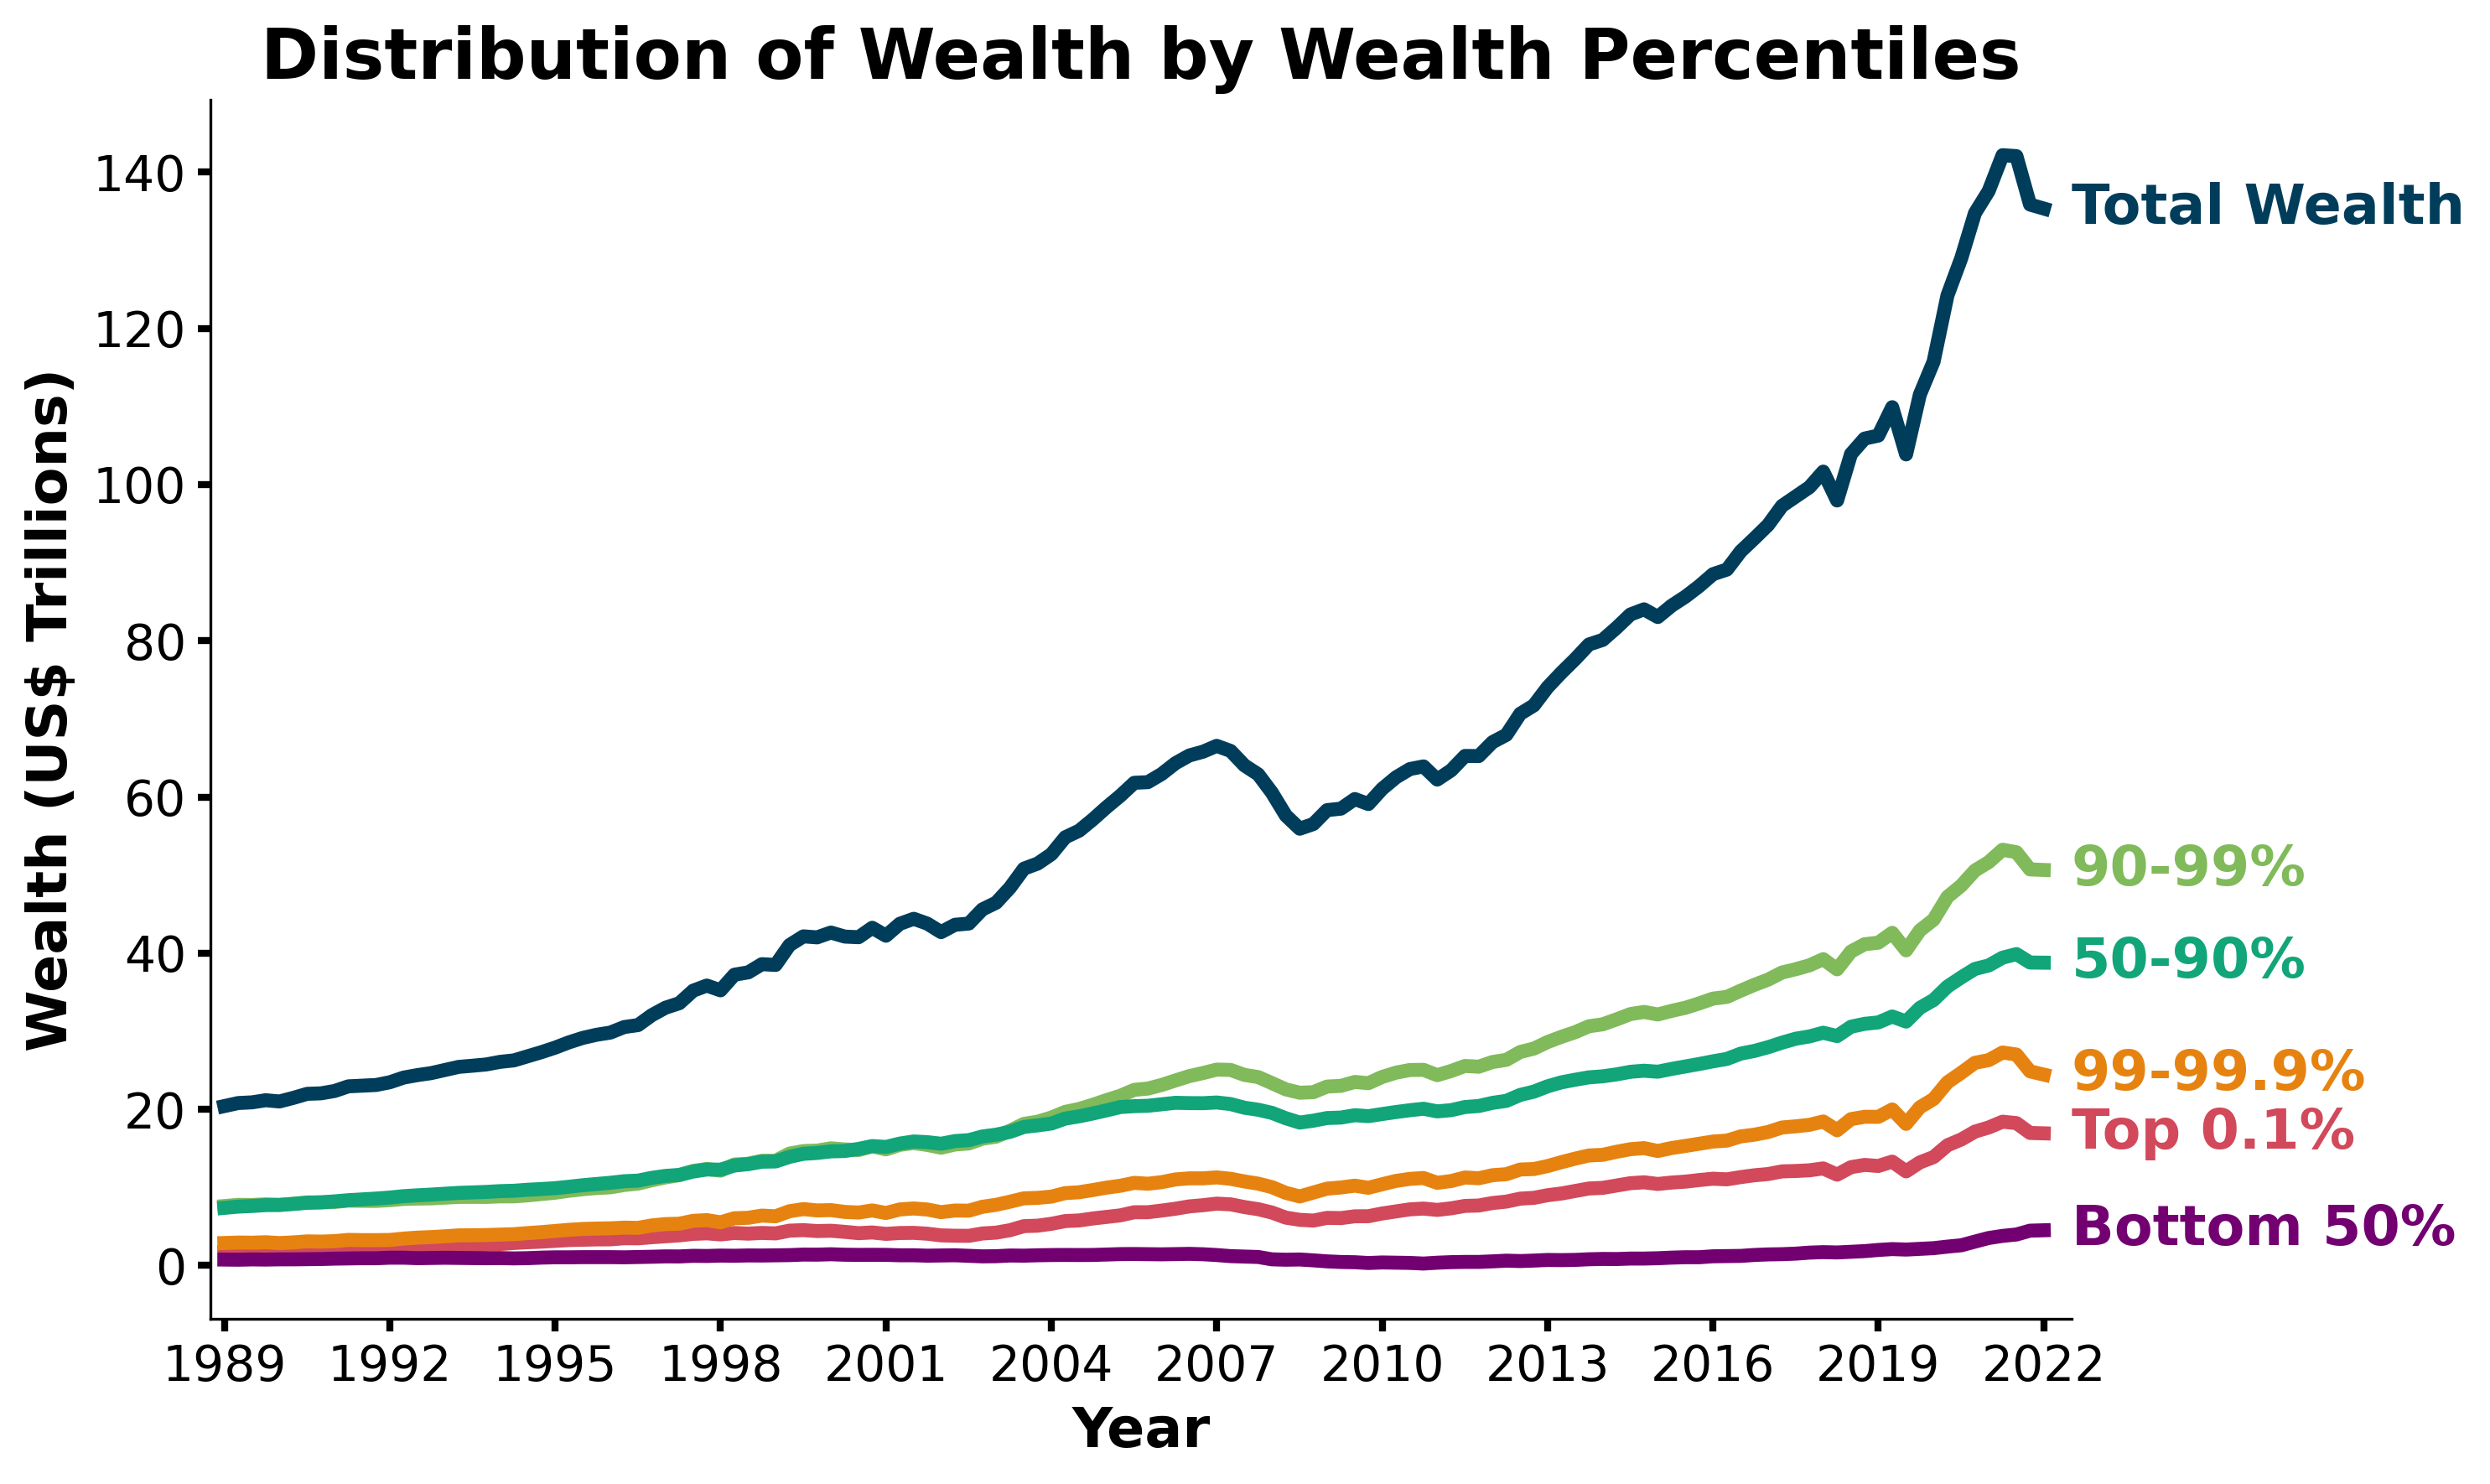

In [12]:
# colors for lines and labels, this include a color for total
wealth_colors=["#d1495b","#E68310","#80BA5A","#11A579","#730071","#003d5b"] 
fig, ax = plt.subplots(figsize = (10,6))

for column, color in zip(df_wealth[df_wealth.columns[5:]], wealth_colors):
    ax.plot(df_wealth[column], linewidth = 4, color=color)

ax.set_ylabel('Wealth (US$ Trillions)', 
              weight = "bold", fontsize=16)
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 14)
ax.tick_params(axis = "x", 
               width = 2, 
               labelsize = 14)
ax.set_xlabel('Year', 
              weight = "bold", fontsize = 16)


# this is the x-values where the labels will start
x_end = pd.to_datetime("2023-01-01")
ax.set_xlim(pd.to_datetime("1989-04-01"), pd.to_datetime("2023-01-01")) # set the x-axis limits
# add a color-matching label for each generation 
for idx, col in enumerate(labels_wealth):
    text = col
    color = wealth_colors[idx]
    y_end = df_wealth[df_wealth.columns[idx+5]][-1]
    ax.text(
        x_end, 
        y_end, 
        text, 
        color = color, 
        fontsize = 16, 
        weight = "bold", 
        va = "center"
    )

ax.text(
        x_end, 
        df_wealth[df_wealth.columns[-1]][-1], 
        "Total Wealth", 
        color = wealth_colors[-1], 
        fontsize = 16, 
        weight = "bold", 
        va = "center"
    )
ax.set_title("Distribution of Wealth by Wealth Percentiles", fontsize = "20", weight = "bold")
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() 
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator)
# change number of ticks, size, and rotation for the axes
plt.xticks(df_wealth.index[::12]) 
ax.tick_params(labelrotation = 0)
ax.spines[['top',"right"]].set_visible(False)

plt.tight_layout()
plt.show()


<details>
  <summary><div class="alert alert-block alert-info">
<b>About this Figure </b> </div></summary>
    
This plot represents US wealth in trillions of dollars from Quarter 3 in 1989 to Quarter 3 in 2022. Each color represents a specific wealth percentiles group in addition to total wealth. As we can see, the distribution of wealth is unequal, with the bottom 50th percentile consistently accounting for the smallest amount of wealth is the US. 
 
   
</details>

#### Plot of Wealth Proportion vs. Date:

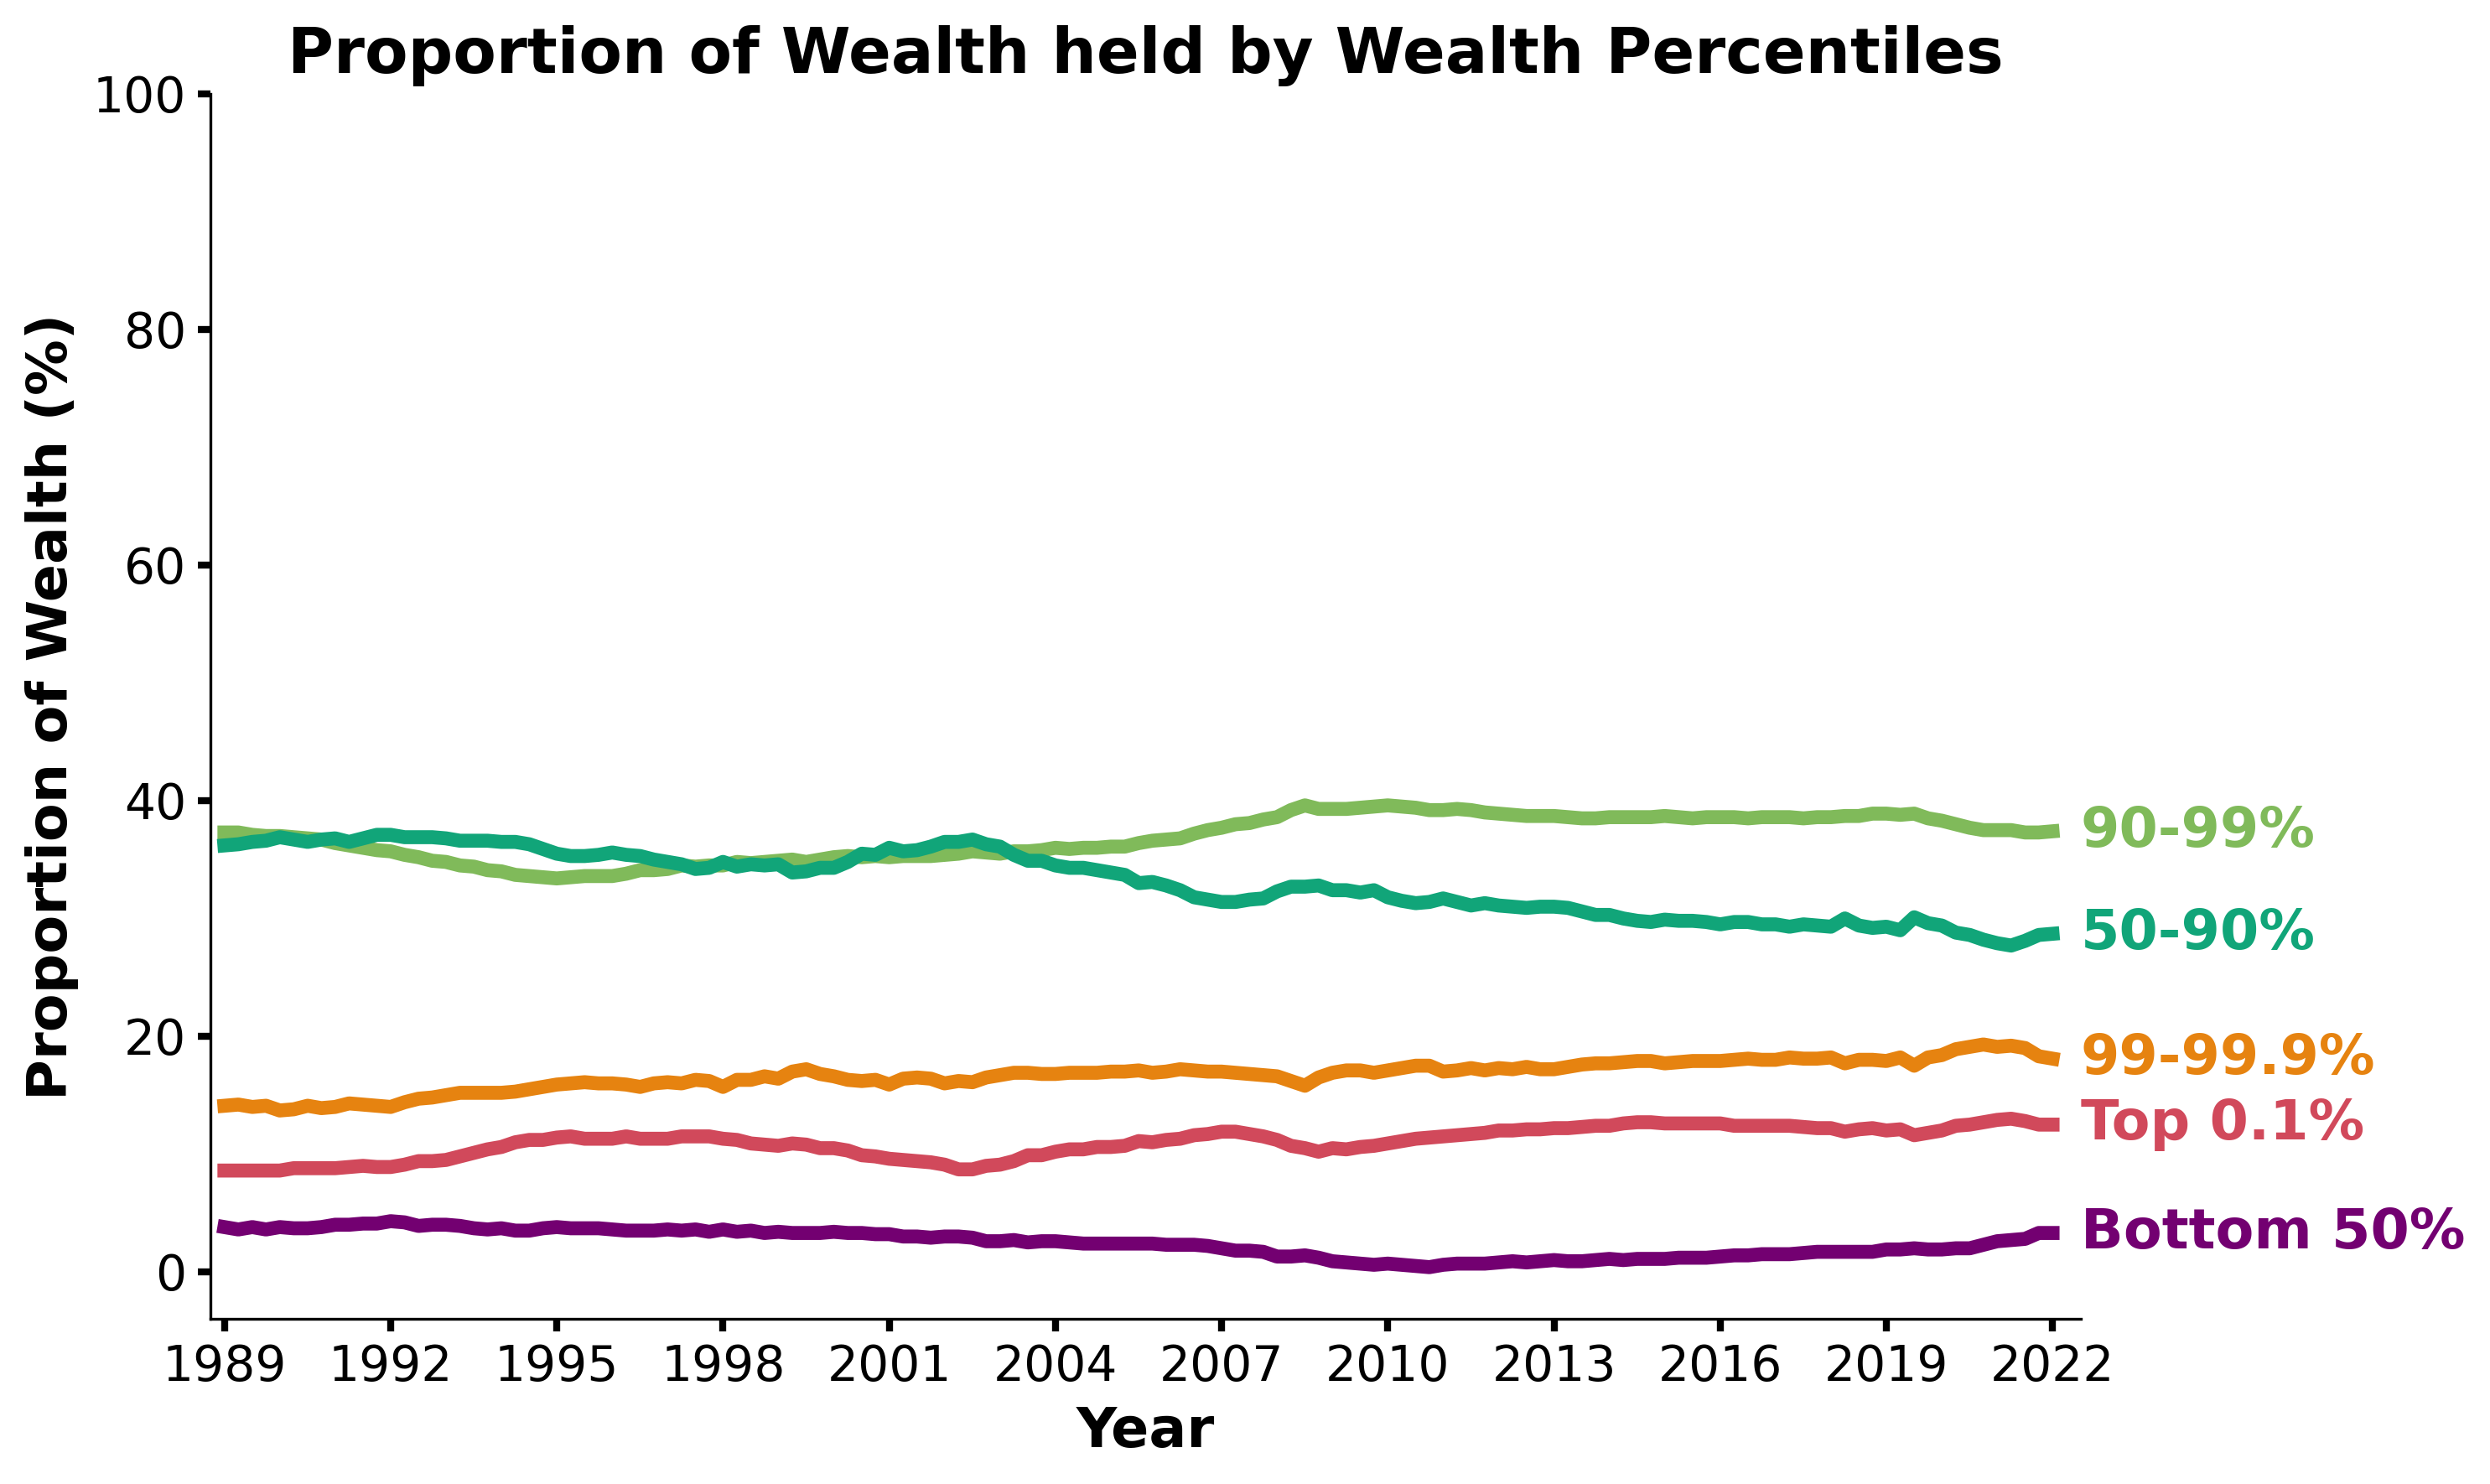

In [13]:
wealth_colors=["#d1495b","#E68310","#80BA5A","#11A579","#730071","#003d5b"] # colors for lines and labels
fig, ax = plt.subplots(figsize = (10, 6))

for column, color in zip(df_wealth[df_wealth.columns[0:5]], wealth_colors):
    ax.plot(df_wealth[column], linewidth=4, color=color)

ax.set_ylabel('Proportion of Wealth (%)', 
              weight = "bold", fontsize=16)
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 14)
ax.tick_params(axis = "x", 
               width = 2, 
               labelsize = 14)
ax.set_xlabel('Year', 
              weight = "bold", fontsize = 16)
ax.set_ylim(-4,100)

# this is the x-values where the labels will start
x_end = pd.to_datetime("2023-01-01")
ax.set_xlim(pd.to_datetime("1989-04-01"), pd.to_datetime("2023-01-01")) # set the x-axis limits
# add a color-matching label for each generation 
for idx, col in enumerate(labels_wealth):
    text = col
    color = wealth_colors[idx]
    y_end = df_wealth[df_wealth.columns[idx]][-1]
    ax.text(
        x_end, 
        y_end, 
        text, 
        color = color, 
        fontsize = 16, 
        weight = "bold", 
        va = "center"
    )

ax.set_title("Proportion of Wealth held by Wealth Percentiles", fontsize = "18", weight = "bold")
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() 
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator)
# change number of ticks, size, and rotation for the axes
plt.xticks(df_wealth.index[::12]) 
ax.tick_params(labelrotation = 0)
ax.spines[['top',"right"]].set_visible(False)

plt.tight_layout()
plt.show()

<details>
  <summary><div class="alert alert-block alert-info">
<b>About this Figure</b> (click me)</div></summary>
This plot represents the proportion of US wealth held by ranges of wealth percentiles (groups indicated by color). Based on this plot, we can see nearly half of US wealth is held by the top 10% and only 5% is held by those in the bottom 50th percentile.
 
   
</details>

## Income Percentile

In [14]:
df_income.head()

,99-100% (%),80-99% (%),60-80% (%),40-60% (%),20-40% (%),0-20% (%),99-100% (US$ Trillions),80-99% (US$ Trillions),60-80% (US$ Trillions),40-60% (US$ Trillions),20-40% (US$ Trillions),0-20% (US$ Trillions),Total wealth (US$ Trillions)
Date,,,,,,,,,,,,,
1989-07-01,16.6,43.9,16.7,12.4,7.5,2.9,3.38,8.97,3.41,2.54,1.53,0.59,20.42
1989-10-01,16.7,44.1,16.7,12.3,7.4,2.9,3.47,9.18,3.48,2.55,1.53,0.60,20.81
1990-01-01,16.5,43.8,16.9,12.4,7.5,3.0,3.44,9.16,3.52,2.58,1.56,0.63,20.89
1990-04-01,16.7,43.8,16.9,12.2,7.4,3.0,3.53,9.26,3.58,2.59,1.57,0.63,21.16
1990-07-01,16.2,43.5,17.1,12.4,7.6,3.2,3.41,9.14,3.58,2.61,1.59,0.68,21.01


In [15]:
df_income.describe().T

,count,mean,std,min,25%,50%,75%,max
99-100% (%),133.0,20.878947,2.876895,16.20,18.60,20.50,23.40,27.20
80-99% (%),133.0,44.502256,1.886694,41.50,42.70,44.30,46.40,47.50
60-80% (%),133.0,16.250376,1.314582,14.30,14.90,16.70,17.20,18.70
40-60% (%),133.0,9.442105,1.539392,7.00,7.80,9.50,10.30,12.40
20-40% (%),133.0,5.806767,1.306290,3.90,4.40,5.60,7.30,7.70
0-20% (%),133.0,3.112782,0.449817,2.20,2.90,3.10,3.40,4.20
99-100% (US$ Trillions),133.0,13.362707,8.761808,3.38,6.60,11.64,18.51,38.59
80-99% (US$ Trillions),133.0,26.996541,14.625465,8.97,14.33,25.68,37.35,63.23
60-80% (US$ Trillions),133.0,9.430827,4.368291,3.41,5.73,9.19,12.18,20.77
40-60% (US$ Trillions),133.0,5.221053,1.968995,2.54,3.38,5.54,6.08,10.27


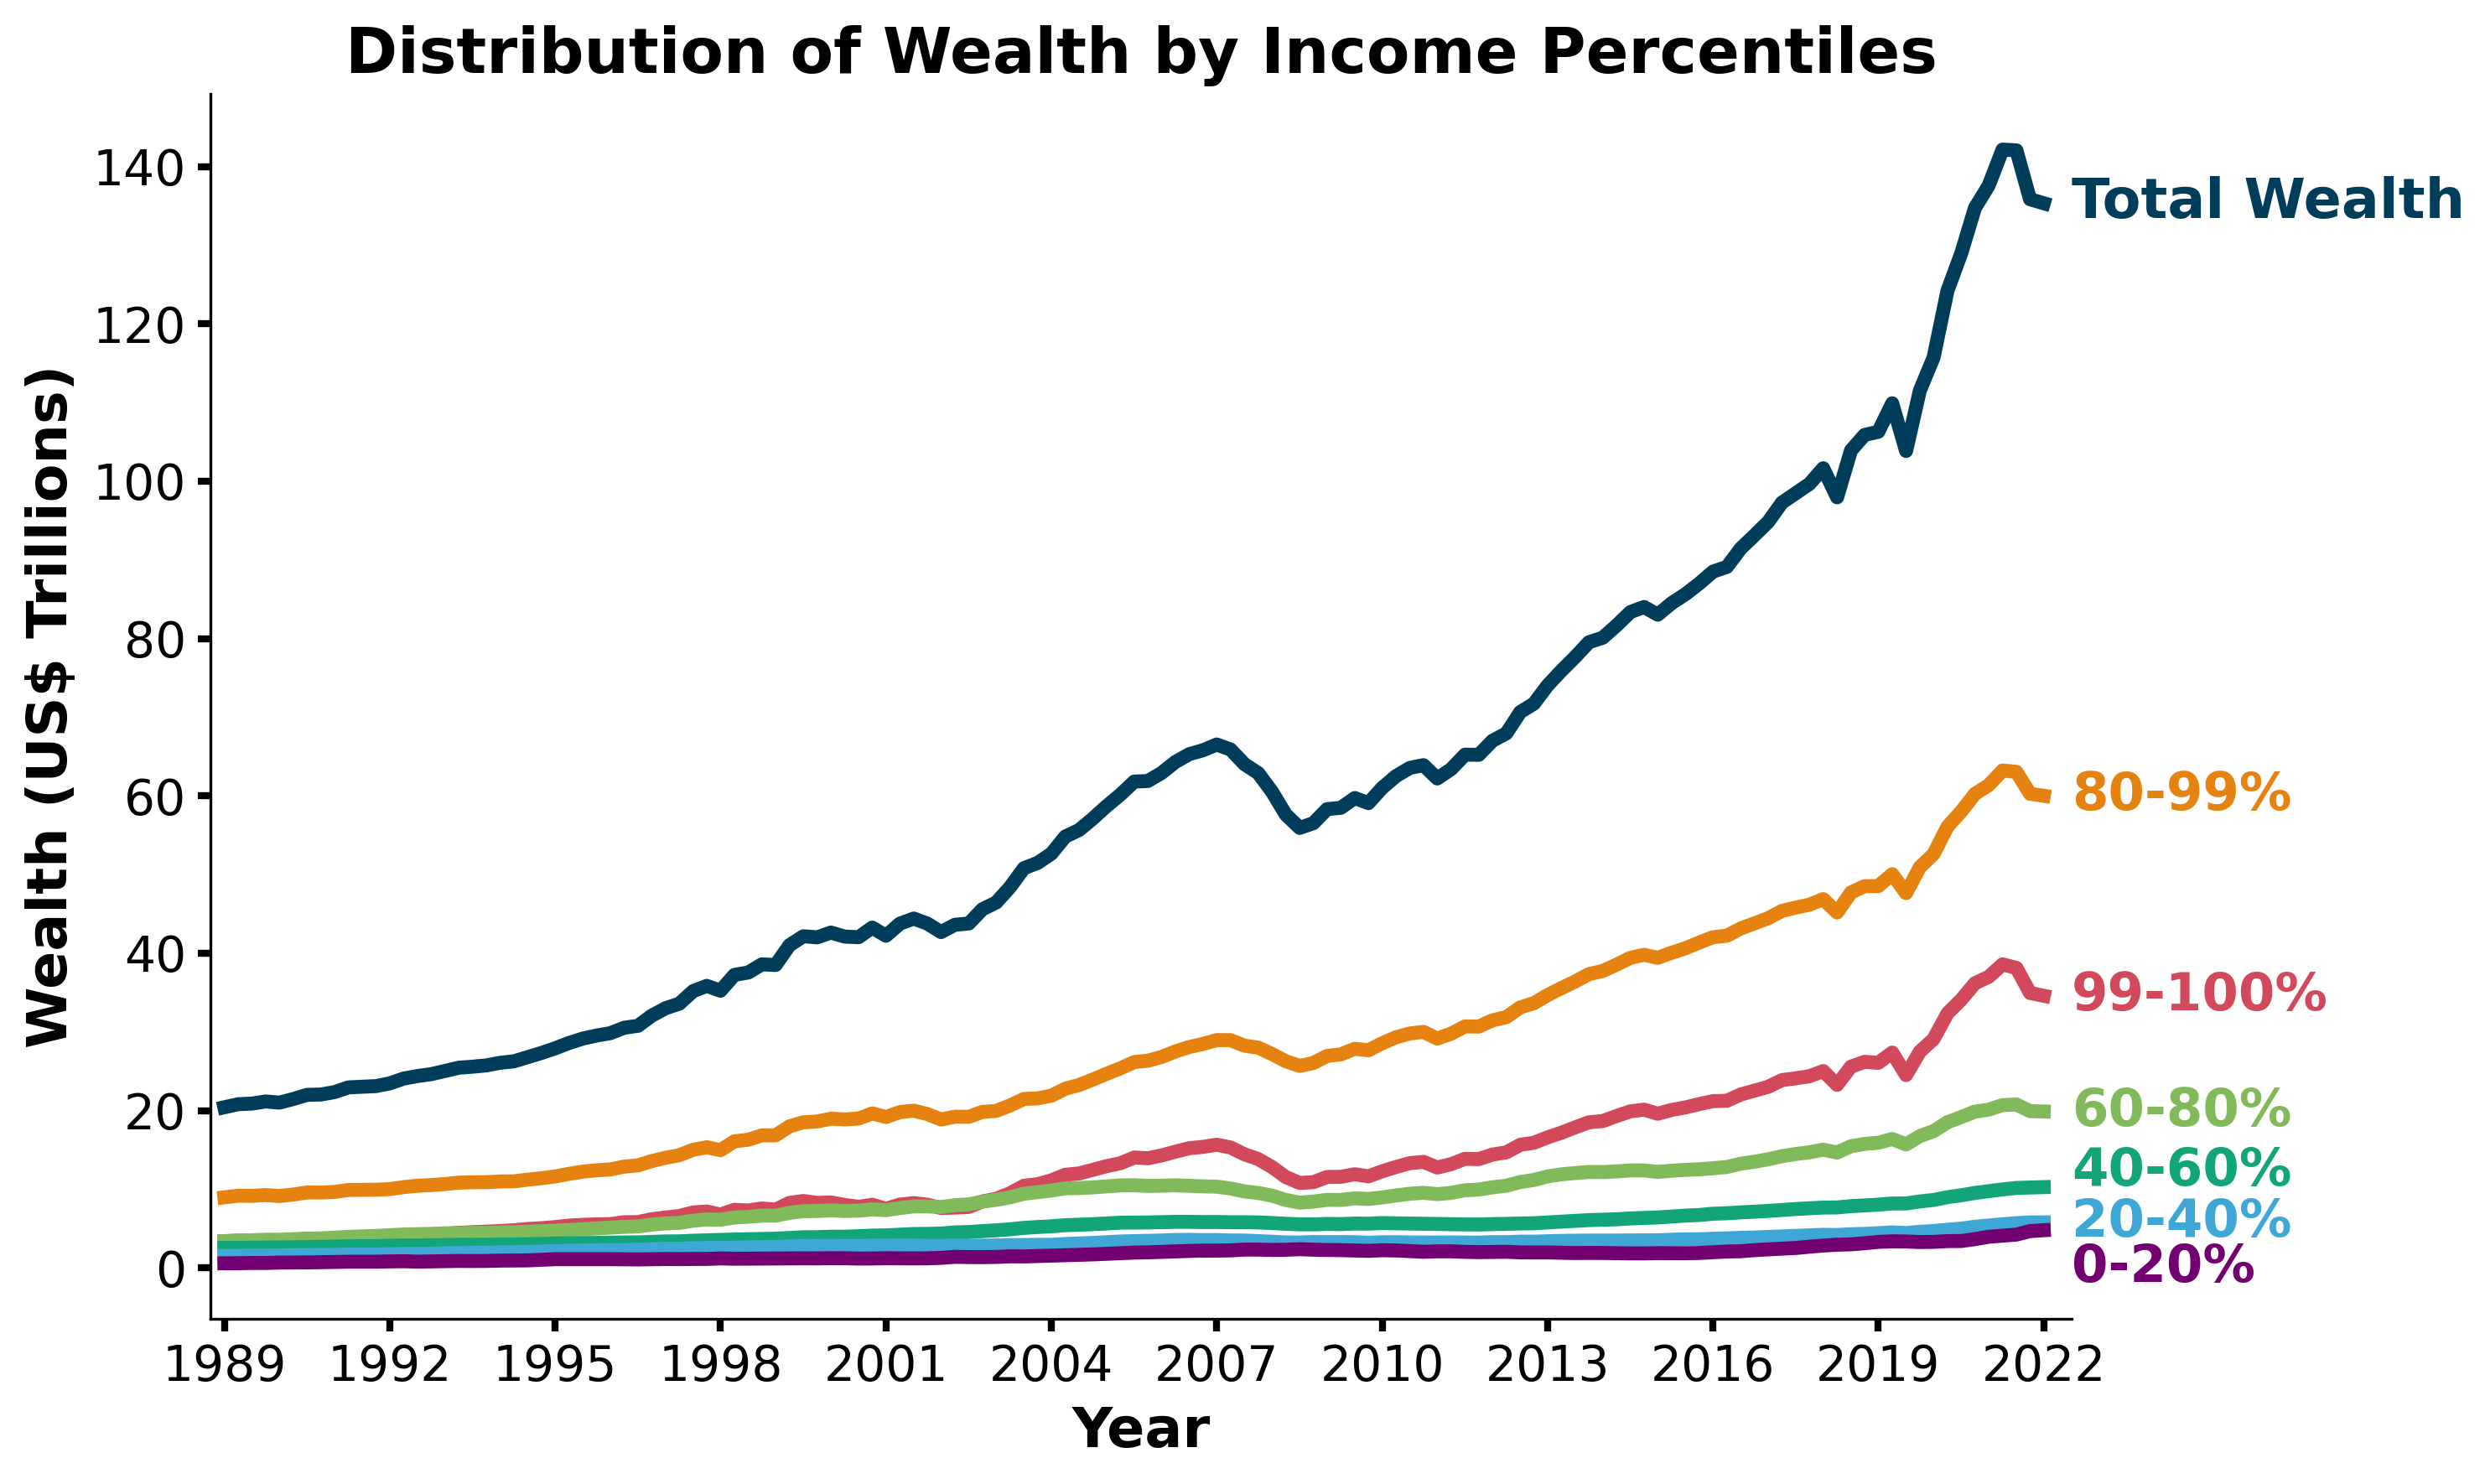

In [17]:
# colors for lines and labels, this include a color for total
income_colors=["#d1495b","#E68310","#80BA5A","#11A579","#3FA7D6","#730071","#003d5b"] 
fig, ax = plt.subplots(figsize = (10, 6))

for column, color in zip(df_income[df_income.columns[6:]], income_colors):
    ax.plot(df_income[column], linewidth = 4, color=color)

ax.set_ylabel('Wealth (US$ Trillions)', 
              weight = "bold", fontsize=16)
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 14)
ax.tick_params(axis = "x", 
               width = 2, 
               labelsize = 14)
ax.set_xlabel('Year', 
              weight = "bold", fontsize = 16)


# this is the x-values where the labels will start
x_end = pd.to_datetime("2023-01-01")
ax.set_xlim(pd.to_datetime("1989-04-01"), pd.to_datetime("2023-01-01")) # set the x-axis limits
# add a color-matching label for each generation 
for idx, col in enumerate(labels_income):
    text = col
    color = income_colors[idx]
    y_end = df_income[df_income.columns[idx+6]][-1]
    # avoiding some label crowding
    if idx == 3: y_end = y_end+2
    if idx == 5: y_end = y_end-4.75
    ax.text(
        x_end, 
        y_end, 
        text, 
        color = color, 
        fontsize = 15, 
        weight = "bold", 
        va = "center"
    )

ax.text(
        x_end, 
        df_income[df_income.columns[-1]][-1], 
        "Total Wealth", 
        color = income_colors[-1], 
        fontsize = 16, 
        weight = "bold", 
        va = "center"
    )
ax.set_title("Distribution of Wealth by Income Percentiles", fontsize = "18", weight = "bold")
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() 
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator)
# change number of ticks, size, and rotation for the axes
plt.xticks(df_income.index[::12]) 
ax.tick_params(labelrotation = 0)
ax.spines[['top',"right"]].set_visible(False)

plt.tight_layout()
plt.show()


<details>
  <summary><div class="alert alert-block alert-info">
<b>About this Figure</b> (click me)</div></summary>
This plot represents US wealth in trillions of dollars from Quarter 3 in 1989 to Quarter 3 in 2022 by Income percentile groups, in addition to the total of US Wealth. As seen on the plot, the distribution of wealth is unequal, with the groups in bottom 60th percentiles consistently showing the smallest amount of growth in wealth. An additional interesting note, we can see that the top 1% (99-100%) and the top 20% (80-99%) income percentiles groups share very similar trends over time, with the latter consistently maintaining nearly twice as much wealth. 
 
   
</details>

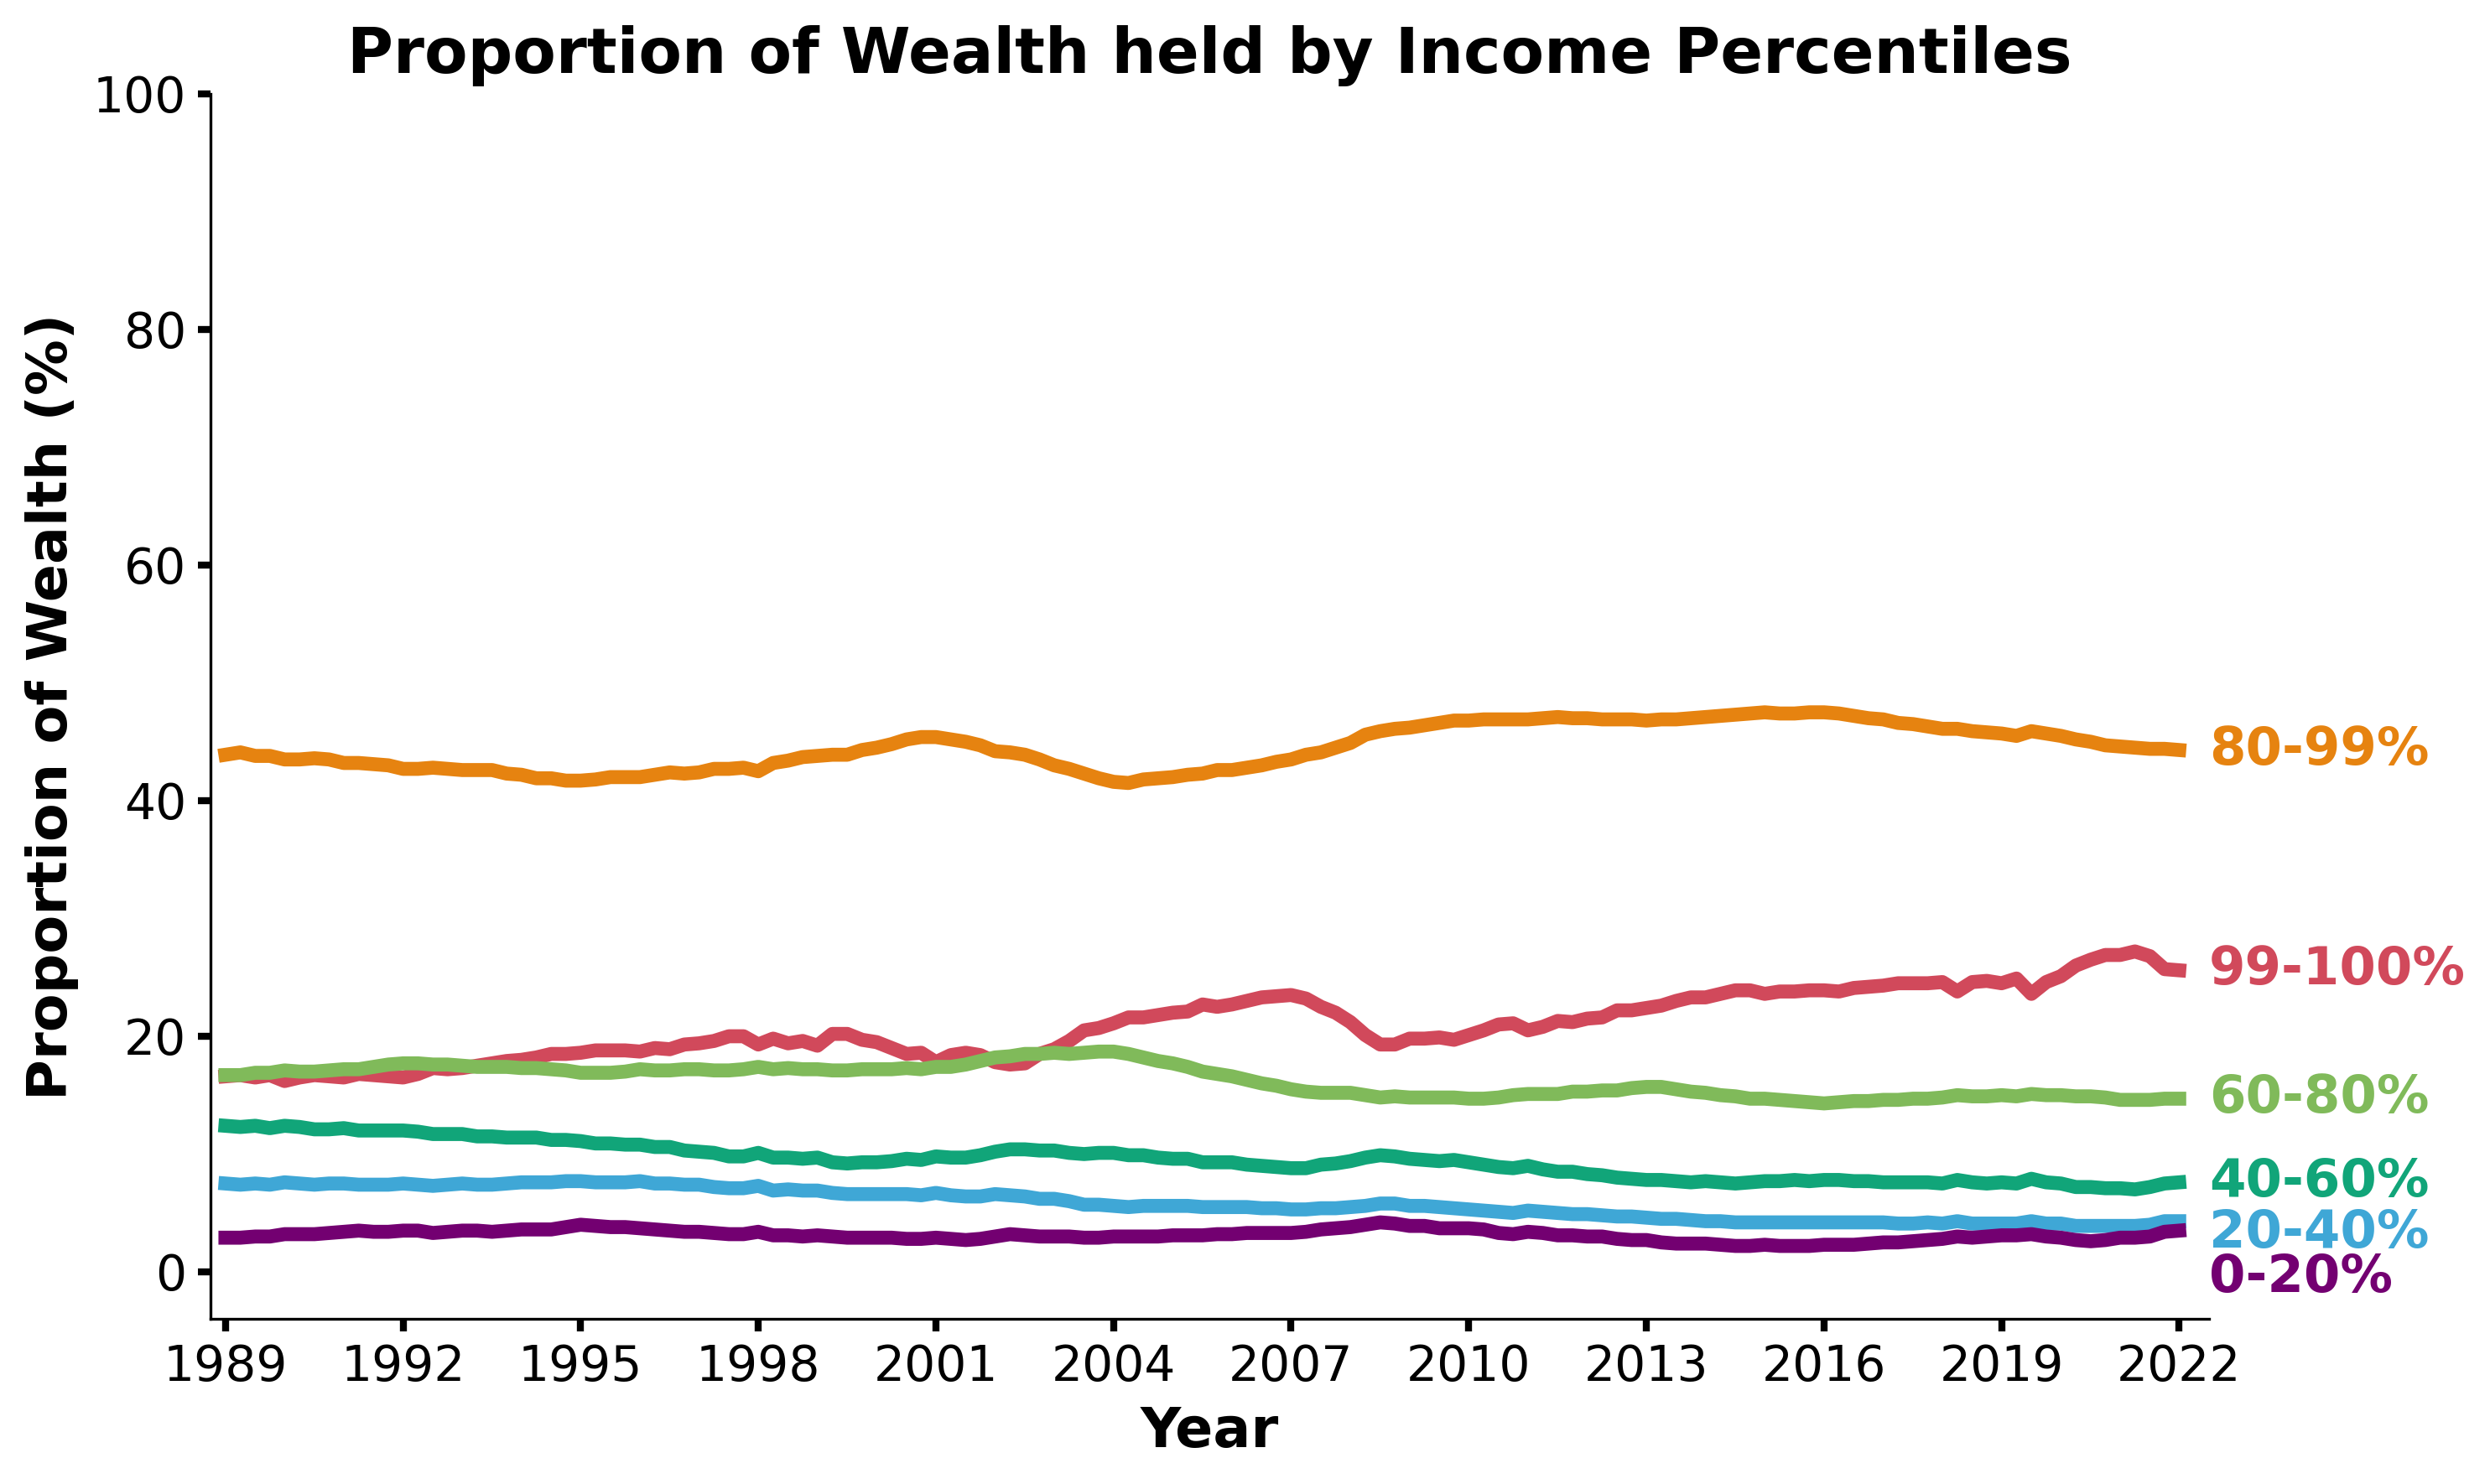

In [16]:
income_colors=["#d1495b","#E68310","#80BA5A","#11A579","#3FA7D6","#730071","#003d5b"] 
fig, ax = plt.subplots(figsize = (10, 6))

for column, color in zip(df_income[df_income.columns[0:6]], income_colors):
    ax.plot(df_income[column], linewidth=4, color=color)

ax.set_ylabel('Proportion of Wealth (%)', 
              weight = "bold", fontsize=16)
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 14)
ax.tick_params(axis = "x", 
               width = 2, 
               labelsize = 14)
ax.set_xlabel('Year', 
              weight = "bold", fontsize=16)
ax.set_ylim(-4,100)

# this is the x-values where the labels will start
x_end = pd.to_datetime("2023-01-01")
ax.set_xlim(pd.to_datetime("1989-04-01"), pd.to_datetime("2023-01-01")) # set the x-axis limits
# add a color-matching label for each generation 
for idx, col in enumerate(labels_income):
    text = col
    color = income_colors[idx]
    y_end = df_income[df_income.columns[idx]][-1]
    # avoiding some label crowding
    if idx == 4: y_end = y_end-1
    if idx == 5: y_end = y_end-4
    ax.text(
        x_end, 
        y_end, 
        text, 
        color = color, 
        fontsize = 15, 
        weight = "bold", 
        va = "center"
    )

ax.set_title("Proportion of Wealth held by Income Percentiles", fontsize = "18", weight = "bold")
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() 
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator)
# change number of ticks, size, and rotation for the axes
plt.xticks(df_income.index[::12]) 
ax.tick_params(labelrotation = 0)
ax.spines[['top',"right"]].set_visible(False)

plt.tight_layout()
plt.show()

<details>
  <summary><div class="alert alert-block alert-info">
<b>About this Figure</b> (click me)</div></summary>
This plot represents the percentage of US Wealth held by Income Percentiles from Quarter 3 in 1989 to Quarter 3 in 2022. Based on this plot, there is a large gap between the proportion of wealth held by those in the 80-99% Income Percentiles versus those in the 0-40% Income Percentile. The disparity maintained an approximate 37% difference between these two Income percentile groups since Quarter 3 in 1989. Another interesting trend we noted for the Top 1% (99-100%) Income percentile group, was a clear increase from the start of 2020 to the 2022. 
 
   
</details>

## Wealth by education
[(back to top)](#Table-of-Contents)

In [17]:
df_edu.head()

,College (%),Some College (%),High School (%),No High School (%),College (US$ Trillions),Some College (US$ Trillions),High School (US$ Trillions),No High School (US$ Trillions),Total wealth (US$ Trillions)
Date,,,,,,,,,
1989-07-01,49.0,19.4,20.5,11.2,10.00,3.96,4.18,2.28,20.42
1989-10-01,50.3,19.0,20.0,10.7,10.47,3.95,4.16,2.23,20.81
1990-01-01,51.1,18.9,19.7,10.3,10.67,3.95,4.11,2.16,20.89
1990-04-01,51.8,18.7,19.5,10.0,10.95,3.96,4.12,2.13,21.16
1990-07-01,52.1,18.8,19.3,9.8,10.94,3.95,4.06,2.05,21.00


In [19]:
df_edu.describe().T

,count,mean,std,min,25%,50%,75%,max
College (%),133.0,62.184211,7.109563,49.00,55.20,63.40,67.90,72.10
Some College (%),133.0,17.612030,1.799959,15.10,16.20,17.10,19.00,21.10
High School (%),133.0,15.698496,3.343990,10.40,13.40,15.70,18.90,21.20
No High School (%),133.0,4.505263,2.364072,1.70,2.60,3.80,5.40,11.20
College (US$ Trillions),133.0,39.265038,24.045757,10.00,18.53,37.05,54.02,101.97
Some College (US$ Trillions),133.0,10.128872,4.682956,3.95,6.85,9.24,12.89,22.52
High School (US$ Trillions),133.0,8.429699,2.653408,4.06,6.42,8.95,10.21,15.50
No High School (US$ Trillions),133.0,2.094286,0.371029,1.45,1.84,2.09,2.31,3.05
Total wealth (US$ Trillions),133.0,59.917895,31.386169,20.42,33.60,57.61,79.52,142.15


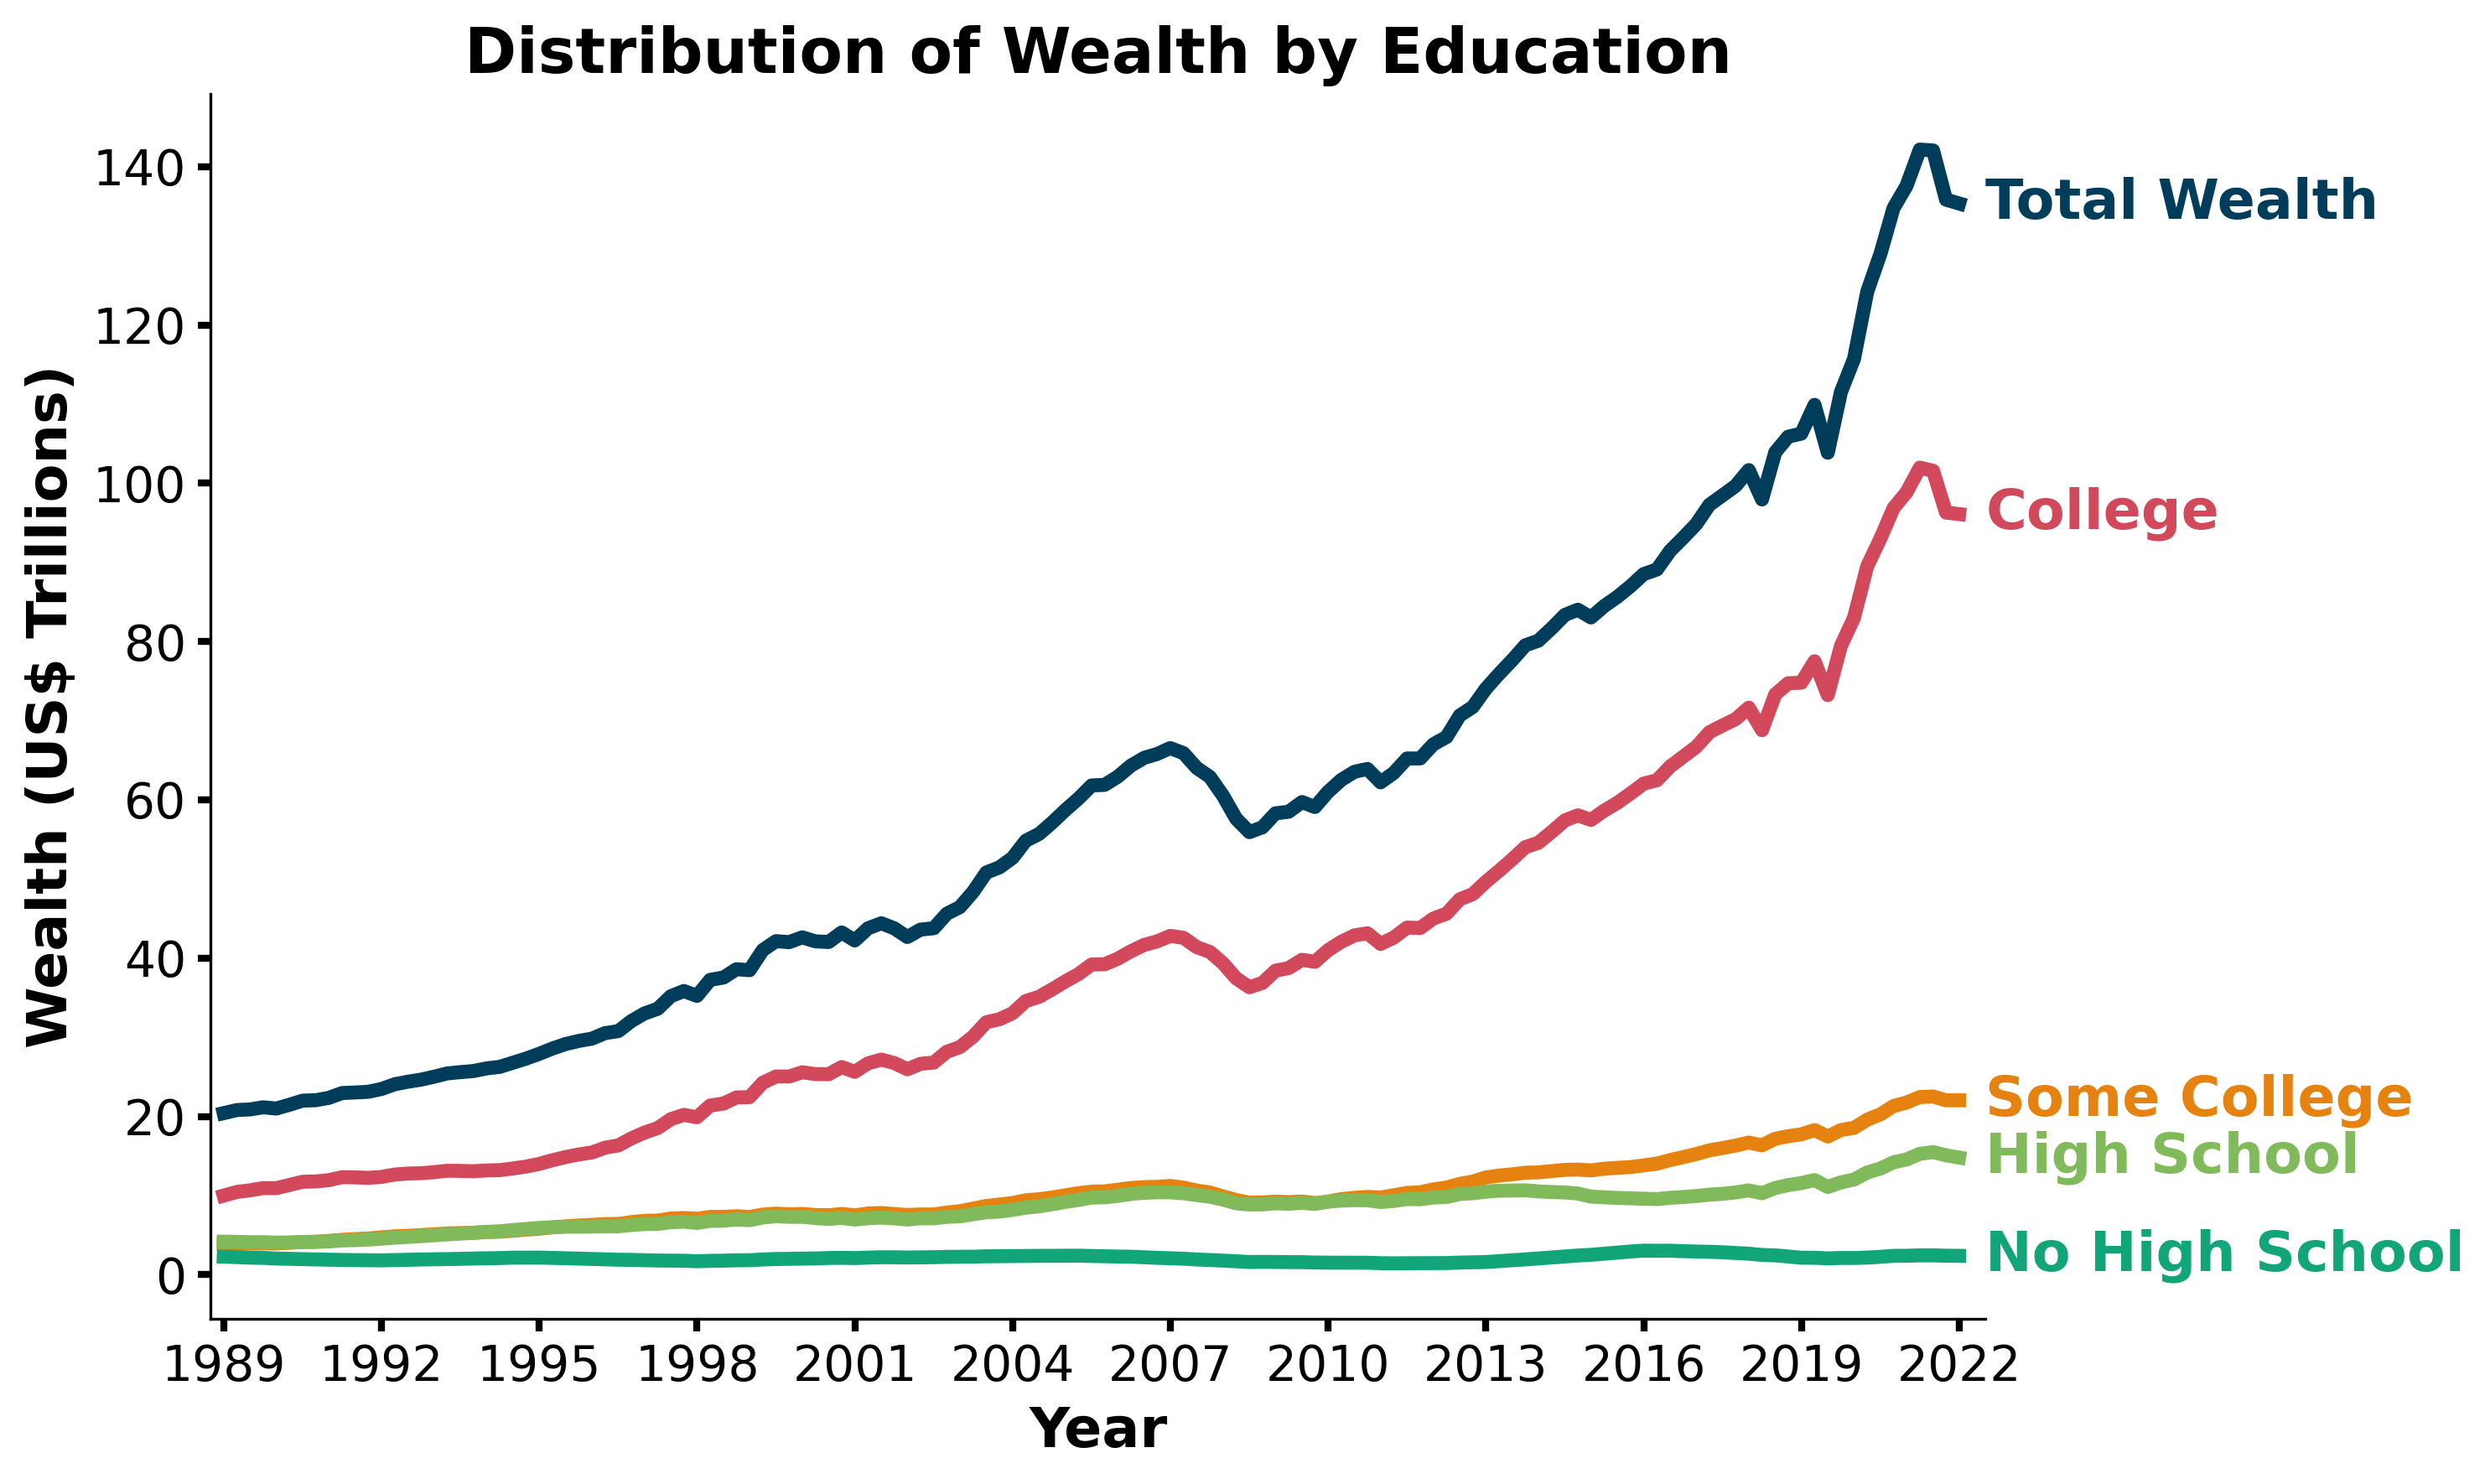

In [18]:
# colors for lines and labels, this include a color for total
edu_colors=["#d1495b","#E68310","#80BA5A","#11A579","#003d5b"] 
fig, ax = plt.subplots(figsize = (10,6))

for column, color in zip(df_edu[df_edu.columns[4:]], edu_colors):
    ax.plot(df_edu[column], linewidth = 4, color=color)

ax.set_ylabel('Wealth (US$ Trillions)', 
              weight = "bold", fontsize=16)
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 14)
ax.tick_params(axis = "x", 
               width = 2, 
               labelsize = 14)
ax.set_xlabel('Year', 
              weight = "bold", fontsize = 16)


# this is the x-values where the labels will start
x_end = pd.to_datetime("2023-01-01")
ax.set_xlim(pd.to_datetime("1989-04-01"), pd.to_datetime("2023-01-01")) # set the x-axis limits
# add a color-matching label for each generation 
for idx, col in enumerate(labels_edu):
    text = col
    color = edu_colors[idx]
    y_end = df_edu[df_edu.columns[idx+4]][-1]
    ax.text(
        x_end, 
        y_end, 
        text, 
        color = color, 
        fontsize = 16, 
        weight = "bold", 
        va = "center"
    )

ax.text(
        x_end, 
        df_edu[df_edu.columns[-1]][-1], 
        "Total Wealth", 
        color = edu_colors[-1], 
        fontsize = 16, 
        weight = "bold", 
        va = "center"
    )
ax.set_title("Distribution of Wealth by Education", fontsize = "18", weight = "bold")
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() 
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator)
# change number of ticks, size, and rotation for the axes
plt.xticks(df_edu.index[::12]) 
ax.tick_params(labelrotation = 0)
ax.spines[['top',"right"]].set_visible(False)

plt.tight_layout()
plt.show()

<details>
  <summary><div class="alert alert-block alert-info">
<b>About this Figure</b> (click me)</div></summary>
This plot represents US wealth in trillions of dollars from Quarter 3 in 1989 to Quarter 3 in 2022 by Education group, in addition to the total of US Wealth. Something we found very interesting is that the wealth distribution for the College education group looks very similar to the Total Wealth Distribution, accounting for approximately 50% of the total wealth.
</details>



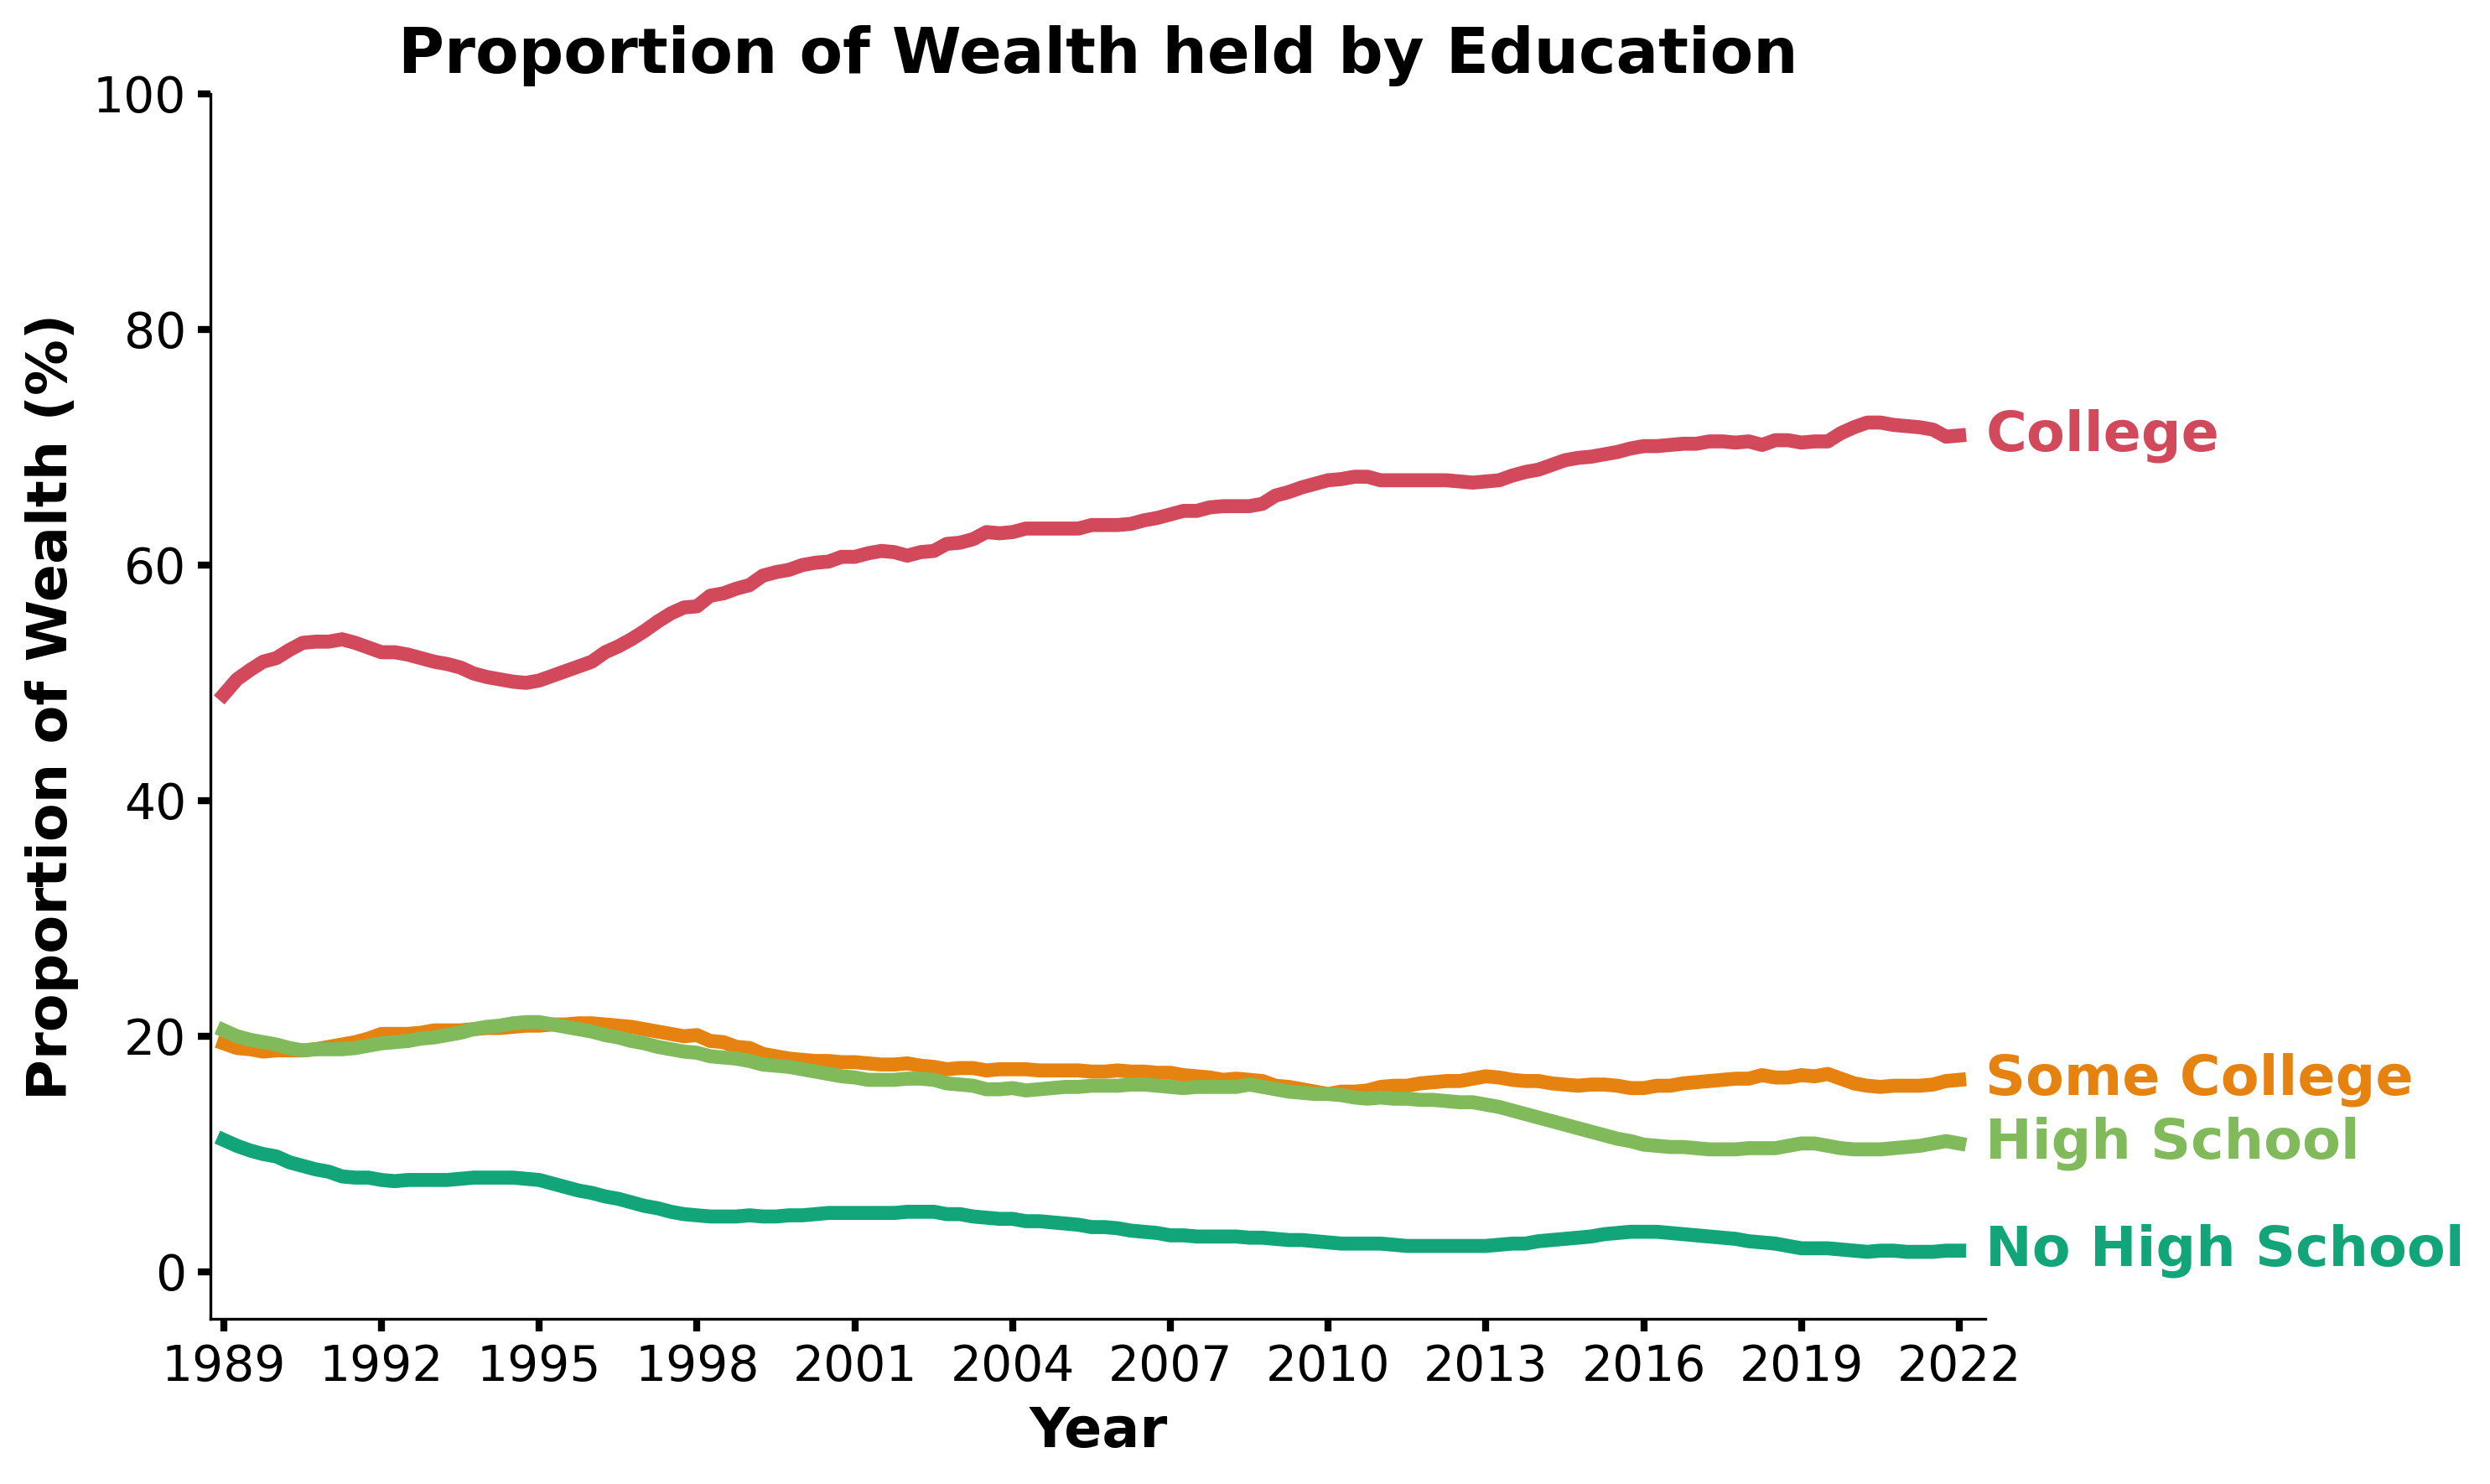

In [19]:
edu_colors=["#d1495b","#E68310","#80BA5A","#11A579","#730071","#003d5b"] # colors for lines and labels
fig, ax = plt.subplots(figsize = (10, 6))

for column, color in zip(df_edu[df_edu.columns[0:4]], edu_colors):
    ax.plot(df_edu[column], linewidth=4, color=color)

ax.set_ylabel('Proportion of Wealth (%)', 
              weight = "bold", fontsize=16)
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 14)
ax.tick_params(axis = "x", 
               width = 2, 
               labelsize = 14)
ax.set_xlabel('Year', 
              weight = "bold", fontsize=16)
ax.set_ylim(-4,100)

# this is the x-values where the labels will start
x_end = pd.to_datetime("2023-01-01")
ax.set_xlim(pd.to_datetime("1989-04-01"), pd.to_datetime("2023-01-01")) # set the x-axis limits
# add a color-matching label for each generation 
for idx, col in enumerate(labels_edu):
    text = col
    color = edu_colors[idx]
    y_end = df_edu[df_edu.columns[idx]][-1]
    ax.text(
        x_end, 
        y_end, 
        text, 
        color = color, 
        fontsize = 16, 
        weight = "bold", 
        va = "center"
    )

ax.set_title("Proportion of Wealth held by Education", fontsize = "18", weight = "bold")
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() 
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator)
# change number of ticks, size, and rotation for the axes
plt.xticks(df_edu.index[::12]) 
ax.tick_params(labelrotation = 0)
ax.spines[['top',"right"]].set_visible(False)

plt.tight_layout()
plt.show()

<details>
  <summary><div class="alert alert-block alert-info">
<b>About this Figure</b> (click me)</div></summary>
This plot represents the percentage of US Wealth held by Education Group over Quarter 1 of 1990 to Quarter 3 of 2022. Based on this plot, we can see that there is a large disparity between the College Educated group versus the rest of the education groups. As time passed, the gap between individuals with a College education widened from approximately 38% compared to individuals with No High School education to over 68% by Quarter 3 of 2022.
   
</details>

## Wealth by generation
[(back to top)](#Table-of-Contents)

In [20]:
df_gen.head()

,Silent and Earlier (%),Baby Boomer (%),GenX (%),Millennial (%),Silent and Earlier (US$ Trillions),Baby Boomer (US$ Trillions),GenX (US$ Trillions),Millennial (US$ Trillions),Total wealth (US$ Trillions)
Date,,,,,,,,,
1989-07-01,78.6,21.1,0.4,0.0,16.05,4.30,0.08,0.0,20.43
1989-10-01,78.3,21.2,0.5,0.0,16.29,4.42,0.10,0.0,20.81
1990-01-01,78.2,21.3,0.5,0.0,16.35,4.46,0.10,0.0,20.91
1990-04-01,78.4,21.1,0.5,0.0,16.60,4.45,0.11,0.0,21.16
1990-07-01,78.6,20.9,0.5,0.0,16.51,4.39,0.11,0.0,21.01


In [21]:
df_gen.describe().T

,count,mean,std,min,25%,50%,75%,max
Silent and Earlier (%),133.0,44.609023,20.121632,12.50,26.80,42.70,61.70,78.60
Baby Boomer (%),133.0,43.660902,11.371794,20.90,34.40,47.10,53.60,55.90
GenX (%),133.0,10.490226,8.376128,0.40,3.80,8.50,17.00,28.90
Millennial (%),133.0,1.234586,1.739690,0.00,0.00,0.40,1.90,6.50
Silent and Earlier (US$ Trillions),133.0,20.815414,2.603010,16.05,18.85,20.91,22.17,26.43
Baby Boomer (US$ Trillions),133.0,28.984436,19.215761,4.30,11.54,29.09,42.82,73.40
GenX (US$ Trillions),133.0,8.863158,10.589358,0.08,1.31,4.86,13.81,40.87
Millennial (US$ Trillions),133.0,1.255263,2.124810,0.00,0.00,0.24,1.53,8.89
Total wealth (US$ Trillions),133.0,59.918271,31.385905,20.43,33.59,57.62,79.53,142.15


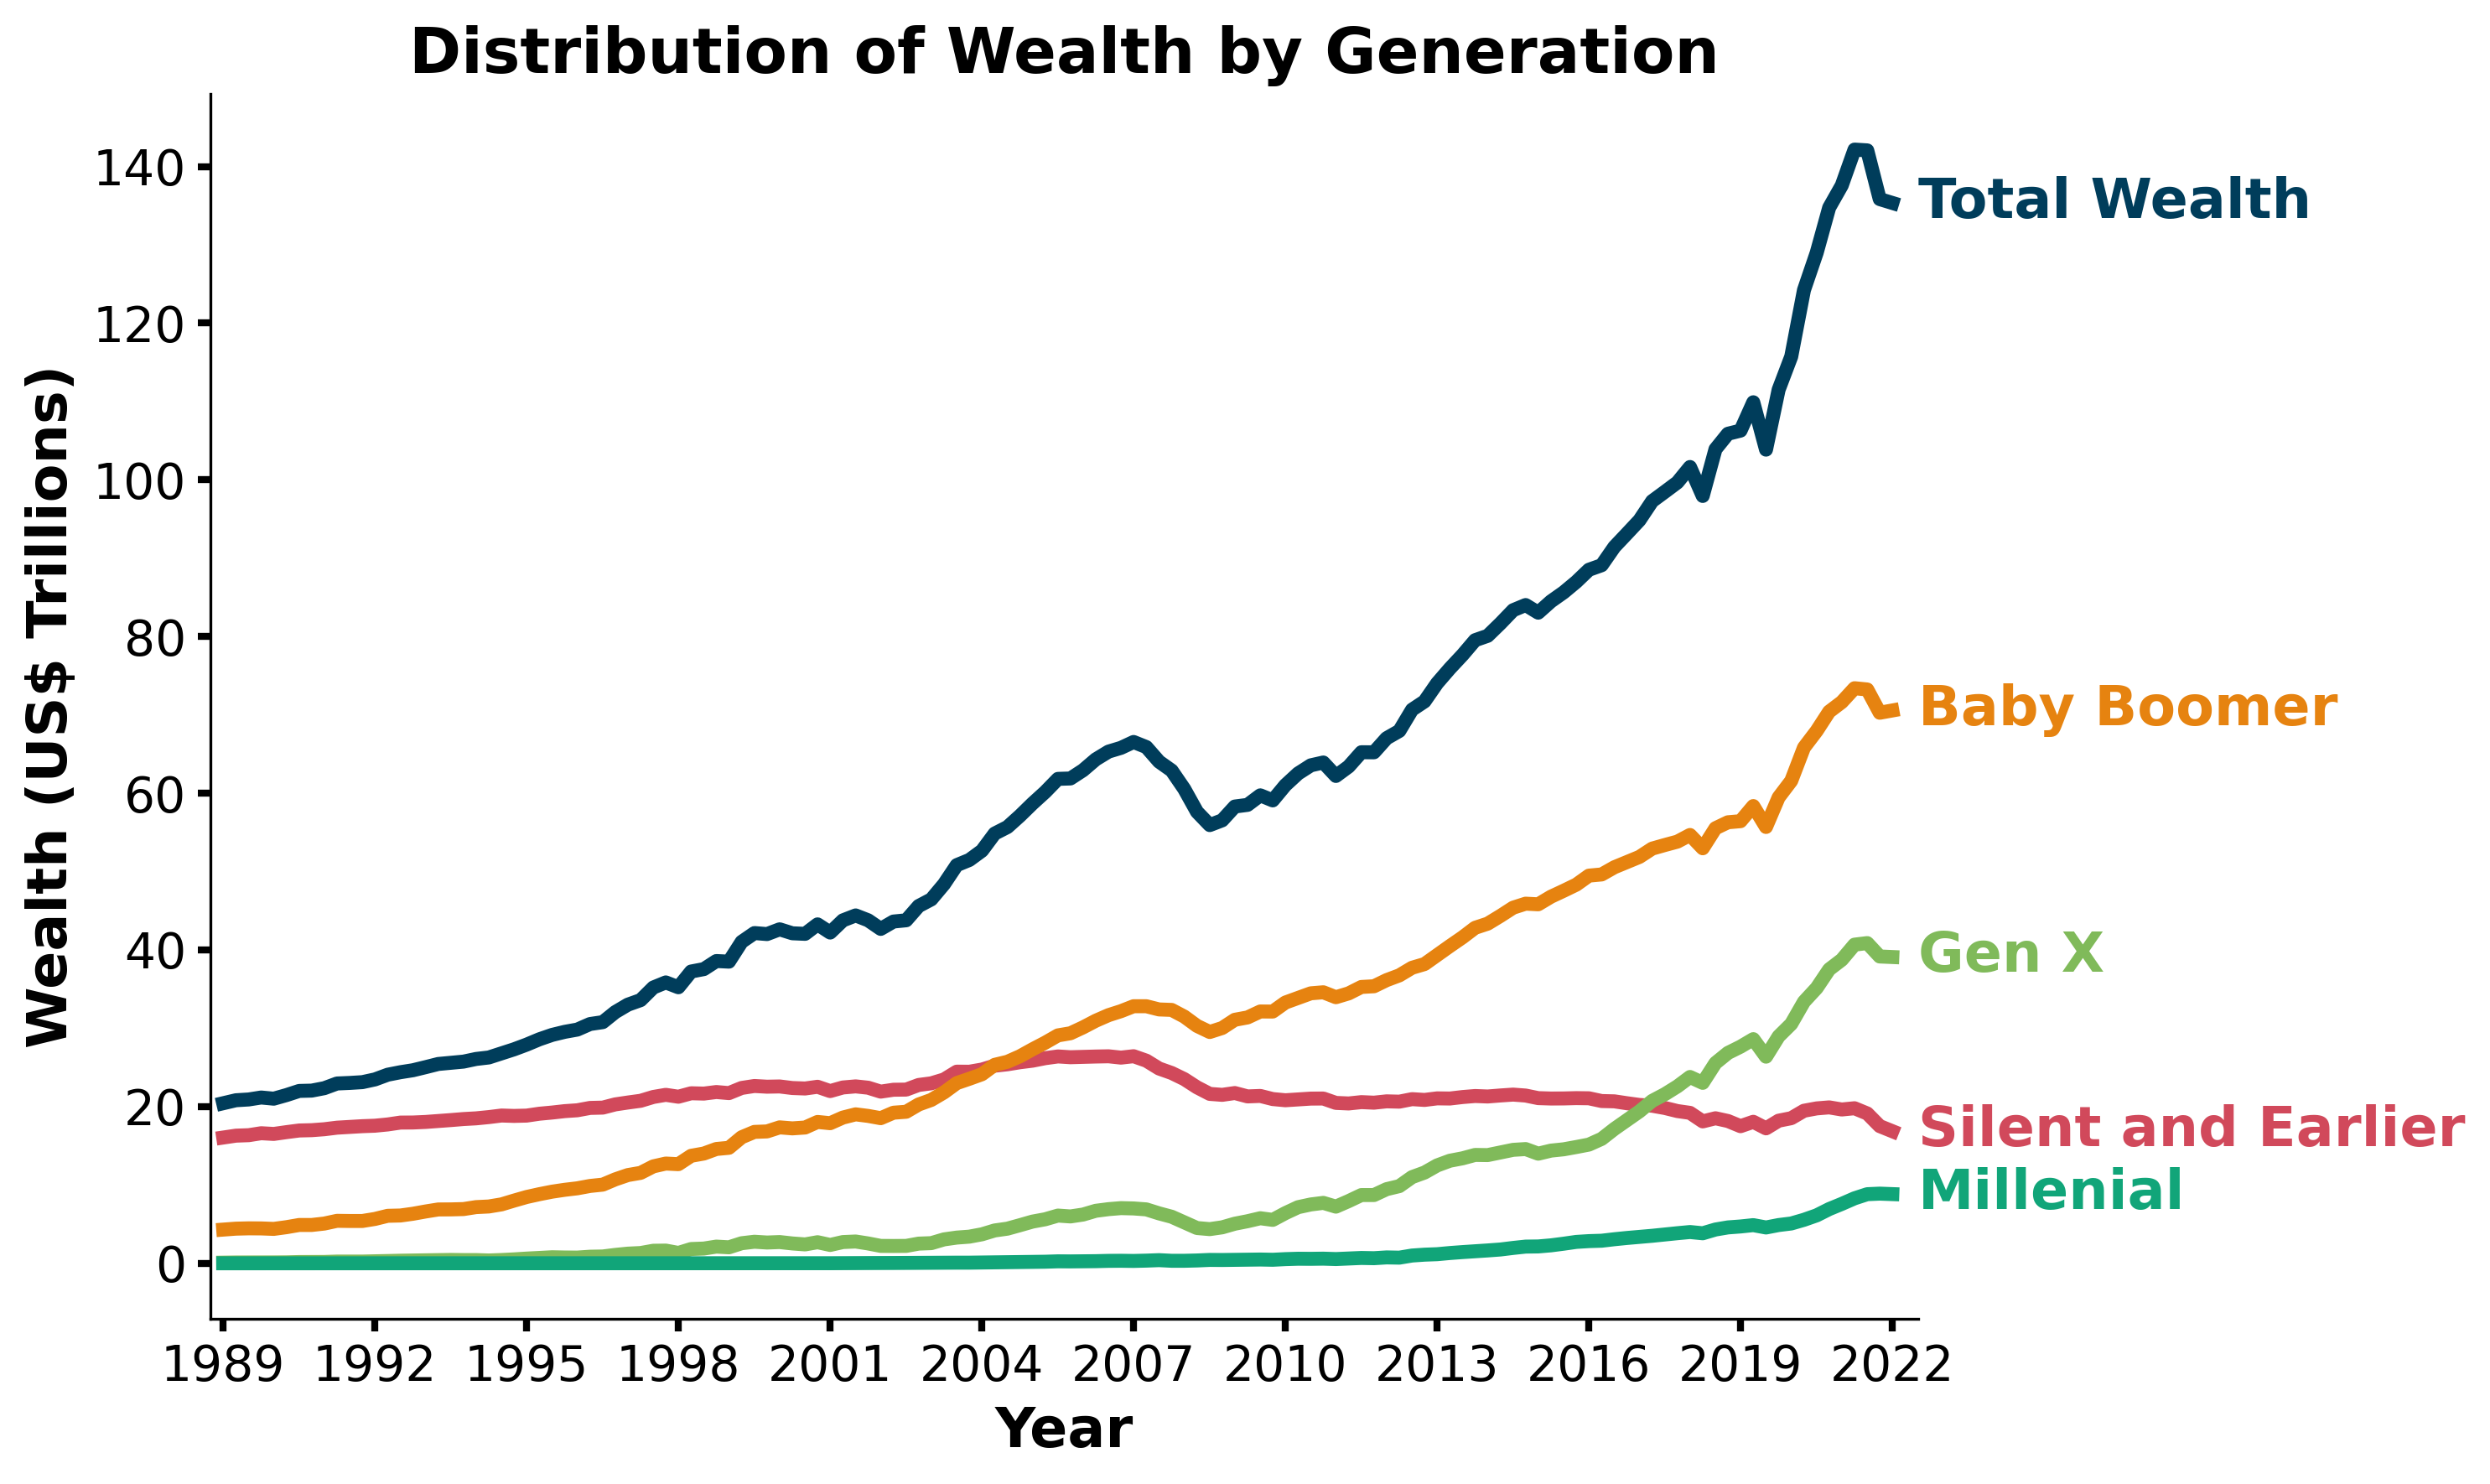

In [22]:
# colors for lines and labels, this include a color for total
gen_colors=["#d1495b","#E68310","#80BA5A","#11A579","#003d5b"] 
fig, ax = plt.subplots(figsize = (10, 6))

for column, color in zip(df_gen[df_gen.columns[4:]], gen_colors):
    ax.plot(df_gen[column], linewidth = 4, color=color)

ax.set_ylabel('Wealth (US$ Trillions)', 
              weight = "bold", fontsize=16)
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 14)
ax.tick_params(axis = "x", 
               width = 2, 
               labelsize = 14)
ax.set_xlabel('Year', 
              weight = "bold", fontsize = 16)


# this is the x-values where the labels will start
x_end = pd.to_datetime("2023-01-01")
ax.set_xlim(pd.to_datetime("1989-04-01"), pd.to_datetime("2023-01-01")) # set the x-axis limits
# add a color-matching label for each generation 
for idx, col in enumerate(labels_gen):
    text = col
    color = gen_colors[idx]
    y_end = df_gen[df_gen.columns[idx+4]][-1]
    ax.text(
        x_end, 
        y_end, 
        text, 
        color = color, 
        fontsize = 16, 
        weight = "bold", 
        va = "center"
    )

ax.text(
        x_end, 
        df_gen[df_gen.columns[-1]][-1], 
        "Total Wealth", 
        color = gen_colors[-1], 
        fontsize = 16, 
        weight = "bold", 
        va = "center"
    )
ax.set_title("Distribution of Wealth by Generation", fontsize = "18", weight = "bold")
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() 
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator)
# change number of ticks, size, and rotation for the axes
plt.xticks(df_gen.index[::12]) 
ax.tick_params(labelrotation = 0)
ax.spines[['top',"right"]].set_visible(False)

plt.tight_layout()
plt.show()


<details>
  <summary><div class="alert alert-block alert-info">
<b>About this Figure</b> (click me)</div></summary>
This plot represents US wealth in trillions of dollars from 1989 to 2022. Each color represents a generation in addition to total wealth of the US. As we can see, the rate of change in wealth over time is not equitable across generations, with the Silent and Earlier and Millennial generations showing relatively stable amounts of wealth over time. This is likely related to age, as the Silent and Earlier generation has aged into retirement during this period while the Millennial have only recently reached young to middle adulthood. The Baby Boomer and Gen X show very similar patterns of growth over time.
   
</details>

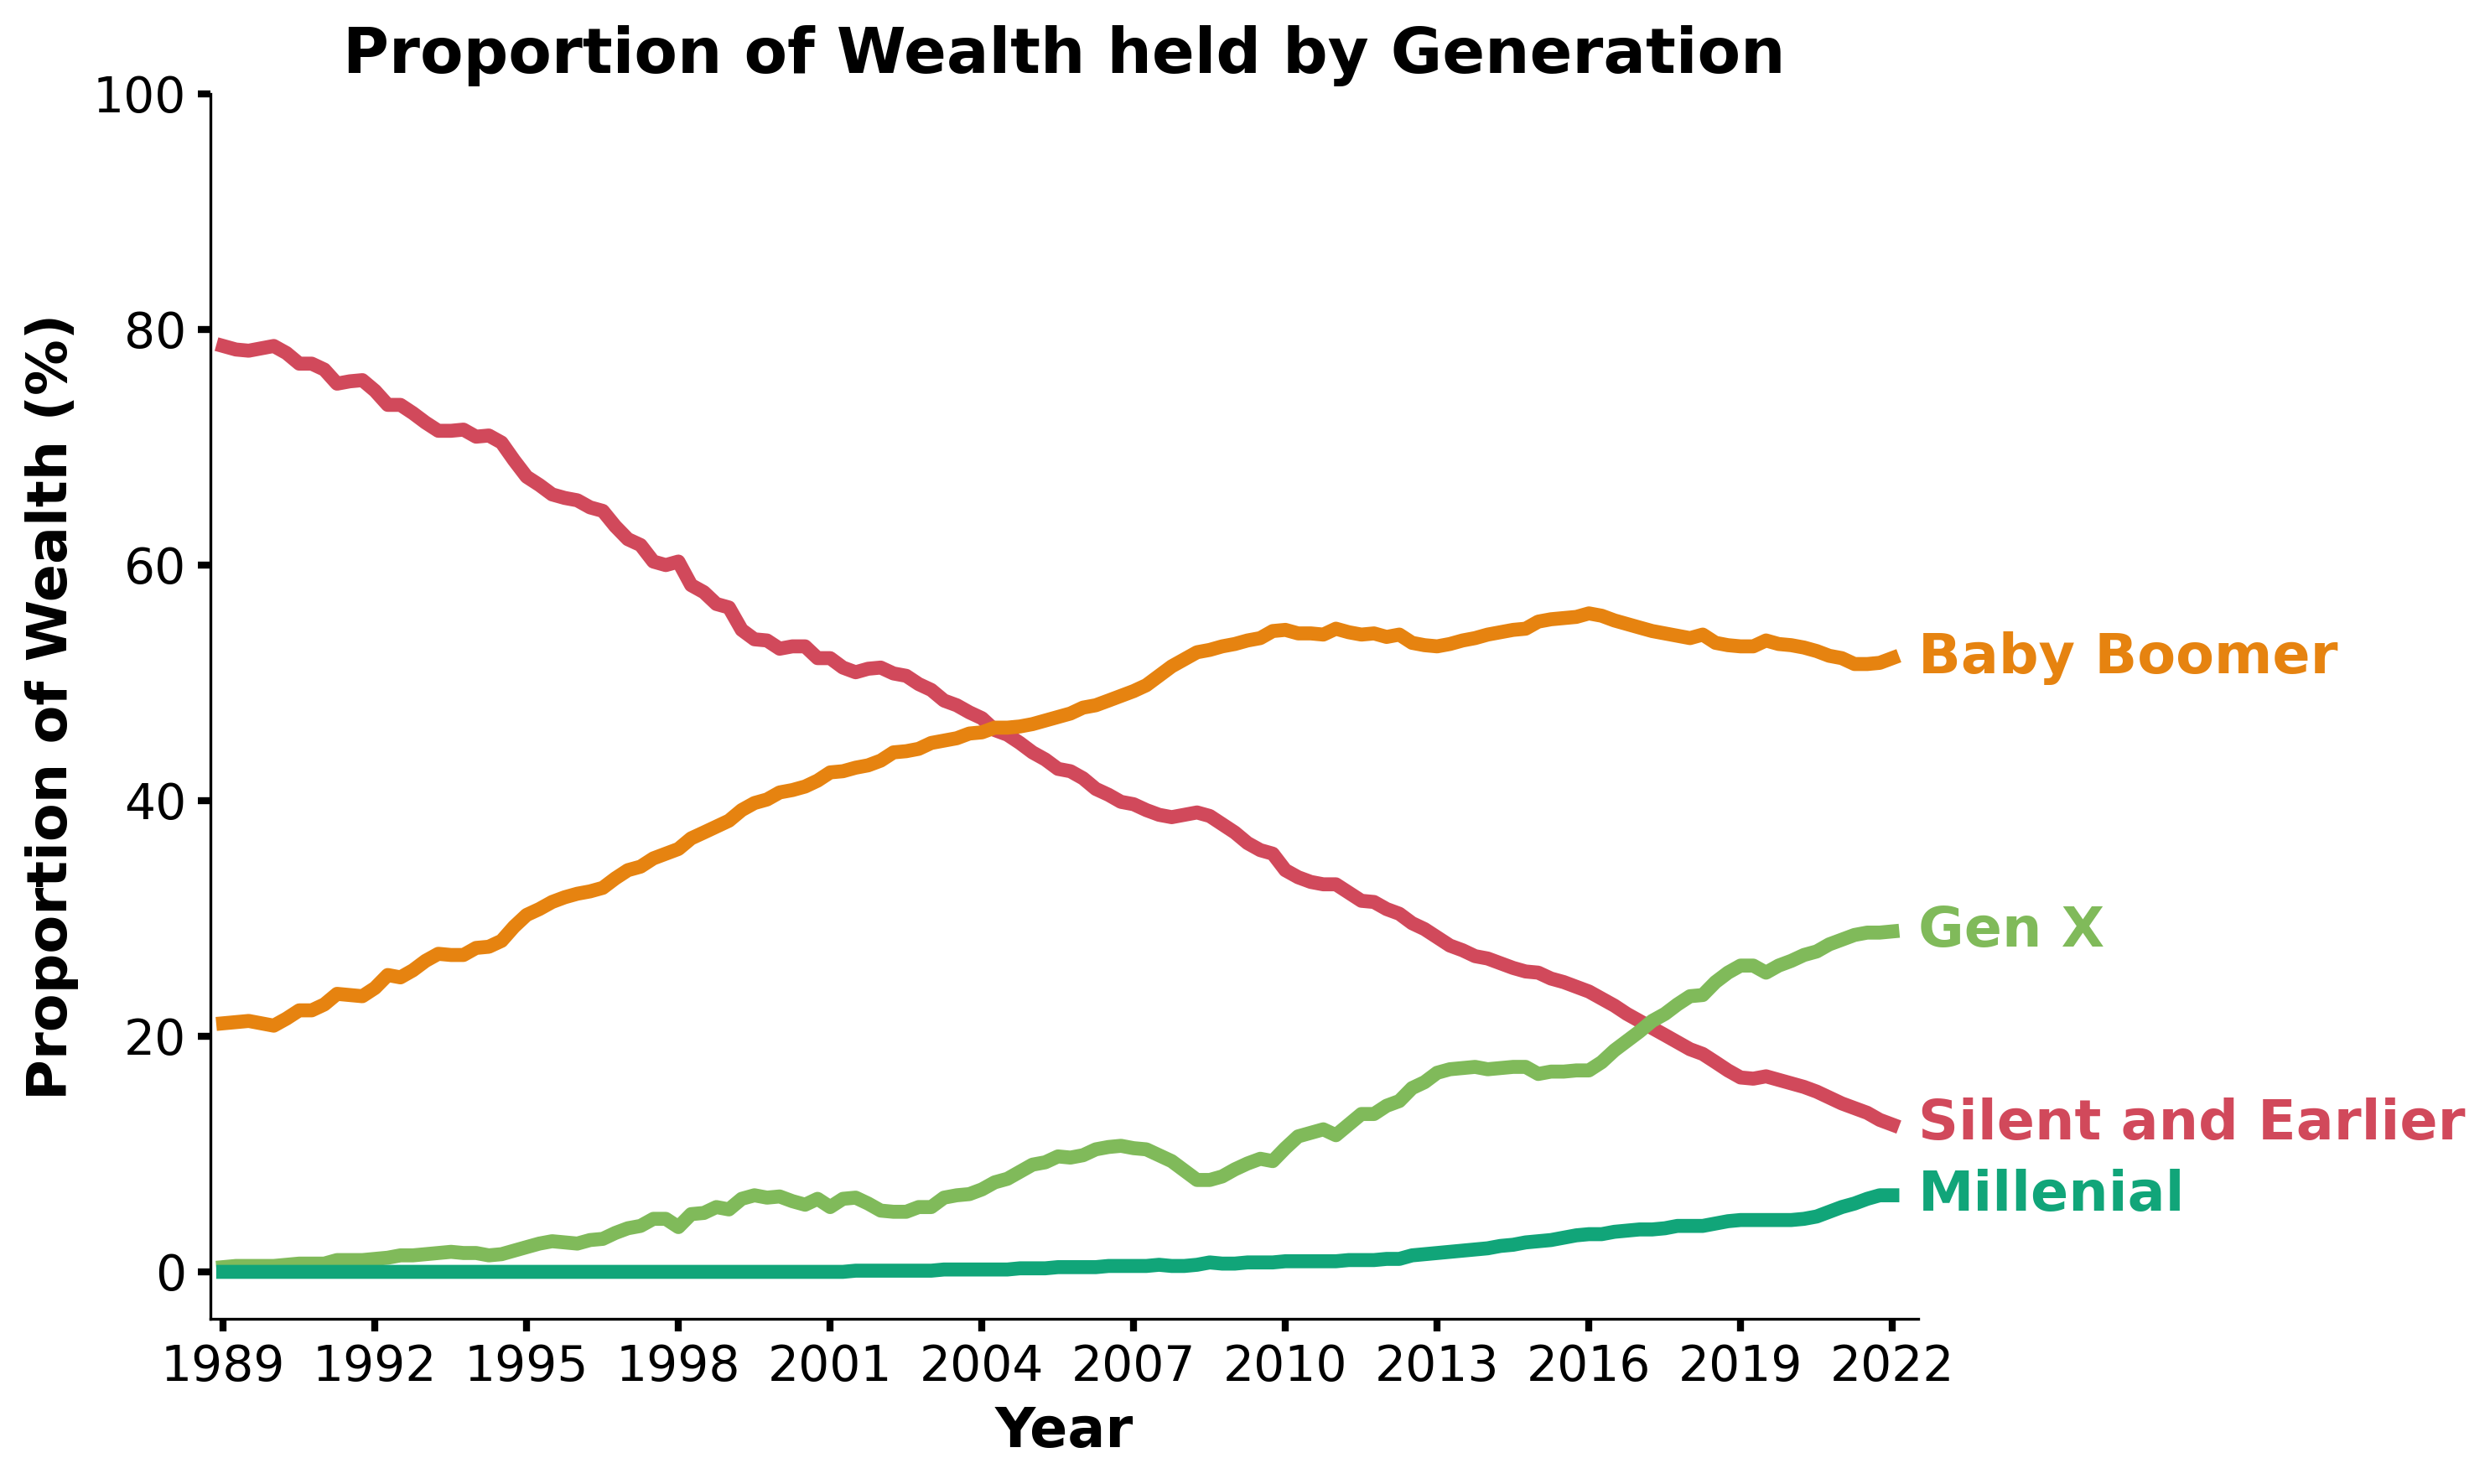

In [23]:
gen_colors=["#d1495b","#E68310","#80BA5A","#11A579","#730071","#003d5b"] # colors for lines and labels
fig, ax = plt.subplots(figsize = (10, 6))

for column, color in zip(df_gen[df_gen.columns[0:4]], gen_colors):
    ax.plot(df_gen[column], linewidth=4, color=color)

ax.set_ylabel('Proportion of Wealth (%)', 
              weight = "bold", fontsize=16)
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 14)
ax.tick_params(axis = "x", 
               width = 2, 
               labelsize = 14)
ax.set_xlabel('Year', 
              weight = "bold", fontsize=16)
ax.set_ylim(-4,100)

# this is the x-values where the labels will start
x_end = pd.to_datetime("2023-01-01")
ax.set_xlim(pd.to_datetime("1989-04-01"), pd.to_datetime("2023-01-01")) # set the x-axis limits
# add a color-matching label for each generation 
for idx, col in enumerate(labels_gen):
    text = col
    color = gen_colors[idx]
    y_end = df_gen[df_gen.columns[idx]][-1]
    ax.text(
        x_end, 
        y_end, 
        text, 
        color = color, 
        fontsize = 16, 
        weight = "bold", 
        va = "center"
    )

ax.set_title("Proportion of Wealth held by Generation", fontsize = "18", weight = "bold")
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() 
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator)
# change number of ticks, size, and rotation for the axes
plt.xticks(df_gen.index[::12]) 
ax.tick_params(labelrotation = 0)
ax.spines[['top',"right"]].set_visible(False)

plt.tight_layout()
plt.show()

<details>
  <summary><div class="alert alert-block alert-info">
<b>About this Figure</b> (click me)</div></summary>
This plot represents US wealth in trillions of dollars from 1989 to 2022. Each color represents a generation in addition to total wealth of the US. As we can see, the rate of change in wealth over time is not equitable across generations, with the Silent and Earlier and Millennial Generations showing relatively stable amounts of wealth over time. This is likely related to age, as the Silent and Earlier generation has aged into retirement during this period while the Millennial have only recently reached young to middle adulthood. The Baby Boomer and Gen X show very similar patterns of growth over time. 
 
   
</details>

## Who holds the most wealth?
[(back to top)](#Table-of-Contents)

In [24]:
# copy wealthiest columns 
df_wealthiest = df_wealth.copy()
df_wealthiest = df_wealthiest.drop(df_wealthiest.columns[[0,1,2,3,4,5,6,8,9,10]], axis=1)
df_wealthiest["Wealth: 90-99%"] = df_wealthiest["90-99% (US$ Trillions)"].values
df_wealthiest = df_wealthiest.drop(df_wealthiest.columns[[0]], axis=1)
df_wealthiest["Income: 80-99%"] = df_income["80-99% (US$ Trillions)"].values
df_wealthiest["College"] = df_edu["College (US$ Trillions)"].values
df_wealthiest["Baby Boomer"] = df_gen["Baby Boomer (US$ Trillions)"].values

In [25]:
wealthiest_colors=["#d1495b","#E68310","#11A579","#730071","#003d5b"] # colors for lines and labels
fig, ax = plt.subplots(figsize = (10, 6))

for column, color in zip(df_wealthiest.columns, wealthiest_colors):
    ax.plot(df_wealthiest[column], linewidth=4, color=color)

ax.set_ylabel('Wealth (US$ Trillions)', 
              weight = "bold", fontsize=16)
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 14)
ax.tick_params(axis = "x", 
               width = 2, 
               labelsize = 14)
ax.set_xlabel('Year', 
              weight = "bold", fontsize=16)


# this is the x-values where the labels will start
x_end = pd.to_datetime("2023-01-01")
ax.set_xlim(pd.to_datetime("1989-04-01"), pd.to_datetime("2023-01-01")) # set the x-axis limits
# add a color-matching label for each generation 
for idx, col in enumerate(df_wealthiest.columns):
    text = col
    color = wealthiest_colors[idx]
    y_end = df_wealthiest[df_wealthiest.columns[idx]][-1]
    ax.text(
        x_end, 
        y_end, 
        text, 
        color = color, 
        fontsize = 16, 
        weight = "bold", 
        va = "center"
    )

ax.set_title("Wealthiest by Amount of Wealth", 
             fontsize = "18", weight = "bold")
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() 
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator)
# change number of ticks, size, and rotation for the axes
plt.xticks(df_wealthiest.index[::12]) 
ax.tick_params(labelrotation = 0)
ax.spines[['top',"right"]].set_visible(False)

plt.tight_layout()
plt.show())

SyntaxError: unmatched ')' (896474339.py, line 49)

In [26]:
# copy over the wealthiest columns
df_wealthiest = df_wealth.copy()
df_wealthiest = df_wealthiest.drop(df_wealthiest.columns[[0,1,3,4,5,6,7,8,9,10]], axis=1)
df_wealthiest["Wealth: 90-99%"] = df_wealthiest["90-99% (%)"].values
df_wealthiest = df_wealthiest.drop(df_wealthiest.columns[[0]], axis=1)
df_wealthiest["Income: 80-99%"] = df_income["80-99% (%)"].values
df_wealthiest["College"] = df_edu["College (%)"].values
df_wealthiest["Baby Boomer"] = df_gen["Baby Boomer (%)"].values

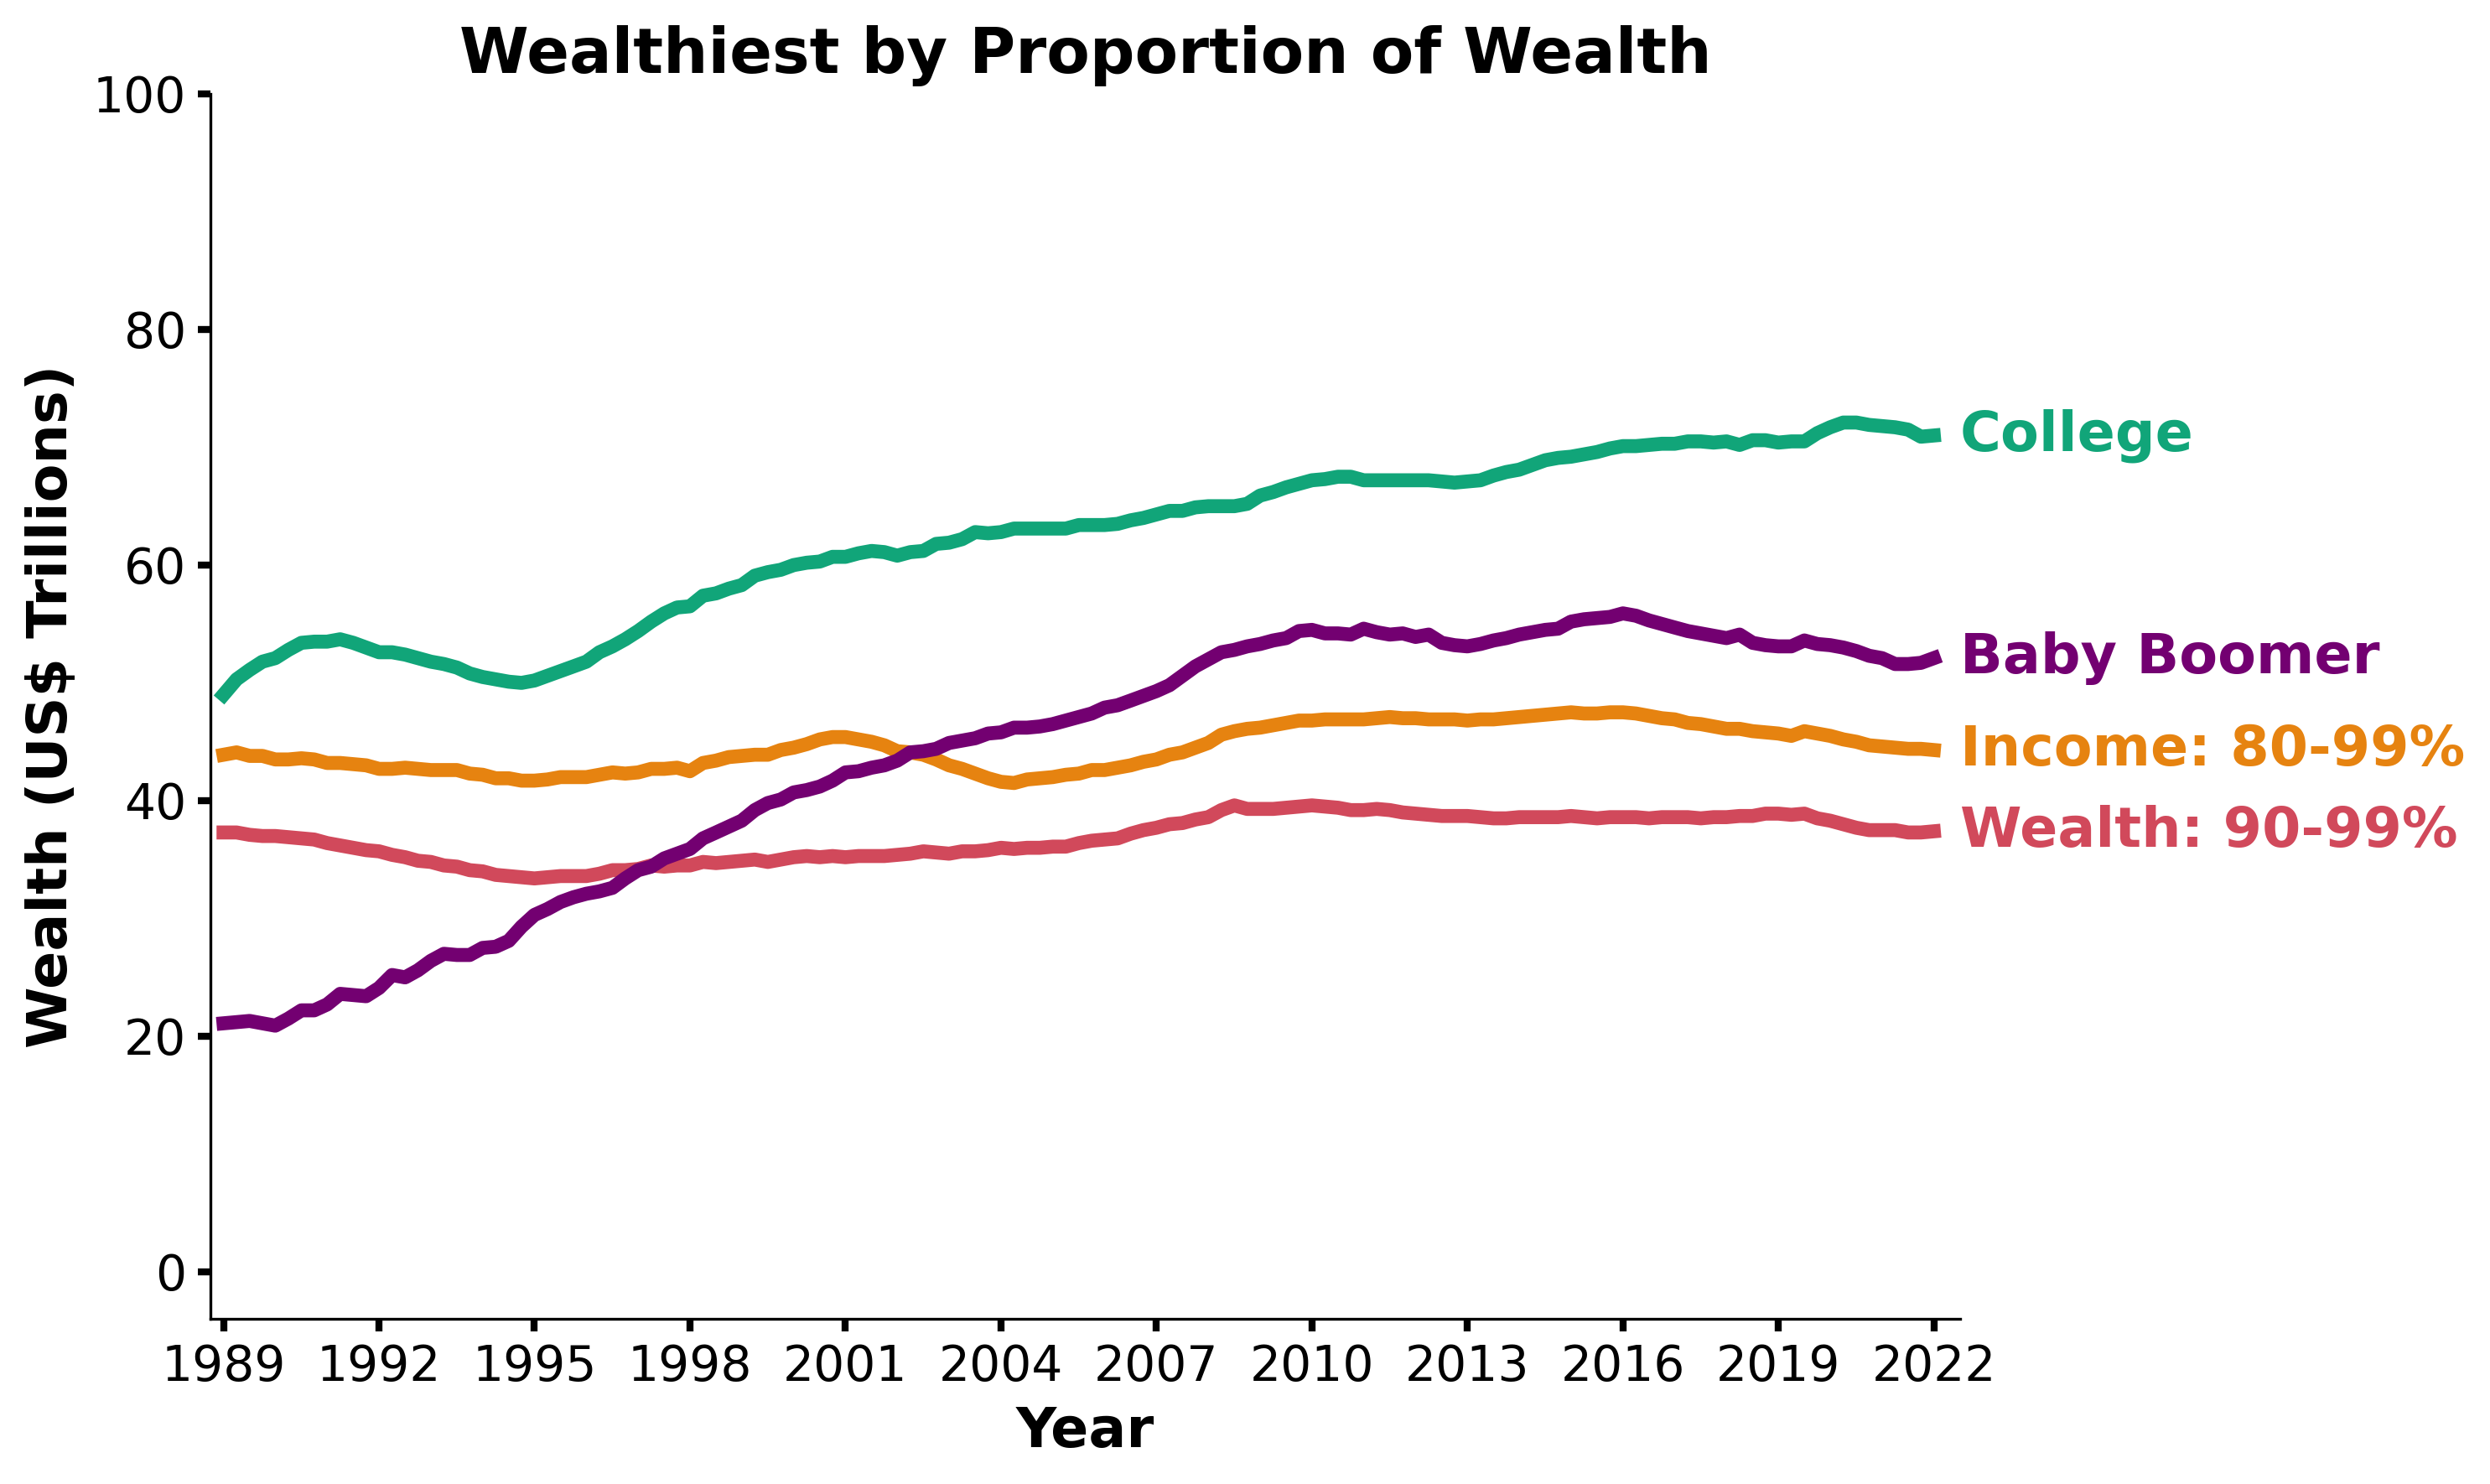

In [27]:
wealthiest_colors=["#d1495b","#E68310","#11A579","#730071","#003d5b"] # colors for lines and labels
fig, ax = plt.subplots(figsize = (10, 6))

for column, color in zip(df_wealthiest.columns, wealthiest_colors):
    ax.plot(df_wealthiest[column], linewidth=4, color=color)

ax.set_ylabel('Proportion of Wealth (%)', 
              weight = "bold", fontsize=16)
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 14)
ax.tick_params(axis = "x", 
               width = 2, 
               labelsize = 14)
ax.set_xlabel('Year', 
              weight = "bold", fontsize=16)
ax.set_ylim(-4,100)

# this is the x-values where the labels will start
x_end = pd.to_datetime("2023-01-01")
ax.set_xlim(pd.to_datetime("1989-04-01"), pd.to_datetime("2023-01-01")) # set the x-axis limits
# add a color-matching label for each generation 
for idx, col in enumerate(df_wealthiest.columns):
    text = col
    color = wealthiest_colors[idx]
    y_end = df_wealthiest[df_wealthiest.columns[idx]][-1]
    ax.text(
        x_end, 
        y_end, 
        text, 
        color = color, 
        fontsize = 16, 
        weight = "bold", 
        va = "center"
    )

ax.set_title("Wealthiest by Proportion of Wealth", 
             fontsize = "18", weight = "bold")
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() 
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator)
# change number of ticks, size, and rotation for the axes
plt.xticks(df_wealthiest.index[::12]) 
ax.tick_params(labelrotation = 0)
ax.spines[['top',"right"]].set_visible(False)

plt.tight_layout()
plt.show()

The figures above plot the wealthiest groups, on average, from each of the data sets we've examined above. While many factors contribute to these values and the groups are not mutually exclusive, these figures give a sense of the most important characteristics related to wealth in the US.

## Final Remarks
[(back to top)](#Table-of-Contents)

In each of the visuals above we explored key characteristics contributing to wealth in the US over the last 33 years. All together, it's clear the college-educated and those in the Baby Boomer generation consistently held a significant proportion of the wealth in this country. We also observed large disparities in wealth when it comes to examining both income and wealth percentiles, with those in the 50th percentile and below holding less 15% of nation's wealth across both metrics.

## About this Project
This collaborative project was created in Jupyter Notebooks and R. We used Jupyter Notebooks to process the data and develop the visualizations. Then, we used python within R Markdown to design and render this page as HTML. You can find the source code for this project in on our Github. Data for this project comes from the US Census Bureau, curated by the 
[Lonely Octopus team](https://www.lonelyoctopus.com/) as part of a data challenge. 


## The Authors 

### Jessica Hooker

<h4>[Linkedin](https://www.linkedin.com/in/jessica-hooker-phd)</h4>
<h4>[Github](https://github.com/j-hook)</h4>

### Erica Luong 
<h4>[Linkedin](https://www.linkedin.com/in/ericaaluong)</h4>
<h4>[Github]()</h4>

### Jeremy Tran 
<h4>[Linkedin](https://www.linkedin.com/in/jeremy-tran-501503246/)</h4>
<h4>[Github](https://github.com/fishingboatman)</h4>




<details>
  <summary><div class="alert alert-block alert-info">
<b>Prompt from Lonely Octopus</b> (click me)</div></summary>
  
    
    Ibraheem — 02/12/2023 5:01 PM
    Hello @everyone 🐙 

    First data challenge!

    Wealth and income are two distinct measures of an individual's financial situation.

    Income is the amount of money an individual earns from employment, investments, or other sources, while wealth is the total value of an individual's assets, including cash, investments, real estate, and other possessions, minus liabilities such as debt.

    In general, income and wealth percentiles are not directly comparable, as a high income does not necessarily translate to a high level of wealth, and vice versa.

    In this challenge; you will look at US Income data from 1989 to 2022 by quarter, in additional to wealth data from the same period segregated by education and generation

    Analyzing data on disparities of household wealth is important for both businesses and society. It can inform business strategies and help companies better understand the financial situation of their potential customers, while also helping policymakers and advocates address wealth inequality and promote economic opportunities for all.

    Build a dashboard or a visualization that displays your findings. Post on LinkedIn using the hashtag #LonelyOctopus at the end. The winner’s post will be reshared on LinkedIn and featured on our official website on March 31st

    You can use the study-space on Discord and work together!

    Data : https://docs.google.com/spreadsheets/d/15JaGK7ps1Bd-4G56OENYscBiaRNfir4rBZhqvNYadkw/edit?usp=sharing

    Can’t wait to see your work. Let the challenge begin! 
   
</details>


<div class="alert alert-block alert-success"><b><h3>Closing remarks</h3></b> 
 <hr>   
Thanks for taking the time to check out our project! Our sincere hope is that at the very least, all of us can learn some cool techniques along the way and share them with you. And at the most, it's interesting and even fun!



If you have any questions feel free to engage with us on LinkedIn.
    


    
<b>Once again, thanks for taking the time to check out our project!</b>
</div>

